# Mass-Spring-Damper System: Analyzing the Principal Components of the $R_X$ and $R_V$ Data Matrixes

In [38]:
### Importing Libraries

import sys
print(sys.version)
import os
import time


### Defining WORKSPACE_PATH

# WORKSPACE_PATH = os.environ['WORKSPACE_PATH']
WORKSPACE_PATH = os.path.join(os.getcwd(), '../../../../../../')
ROMNet_fld     = os.path.join(WORKSPACE_PATH, 'ROMNet/romnet/')


### Importing External Libraries

import numpy                             as np
import pandas                            as pd


### Importing Matplotlib and Its Style

import matplotlib.pyplot                 as plt

#plt.style.use(os.path.join(WORKSPACE_PATH, 'ROMNet/romnet/extra/postprocessing/presentation.mplstyle'))
#plt.style.use(os.path.join(WORKSPACE_PATH, 'ROMNet/romnet/extra/postprocessing/paper_1column.mplstyle'))
plt.style.use(os.path.join(WORKSPACE_PATH, 'ROMNet/romnet/extra/postprocessing/paper_1column.mplstyle'))
#plt.style.use(os.path.join(WORKSPACE_PATH, 'ROMNet/romnet/extra/postprocessing/paper_2columns.mplstyle'))


# from scipy.integrate import solve_ivp
# import pyDOE
from PCAfold         import PCA          as PCAA

3.9.12 (main, Mar 26 2022, 15:51:13) 
[Clang 12.0.0 (clang-1200.0.32.29)]


In [48]:
OutputDir       = os.path.join(WORKSPACE_PATH, 'ROMNet/Data/Rect_200Instants_TransRotScale/Orig/')
FigDir          = os.path.join(WORKSPACE_PATH, '../Desktop/Paper_Figures_DeepONet_TEMP/')

Vars            = ['z']
NVars           = len(Vars)

n_ics           = 200
valid_perc      = 20

Nx              = 200
Ny              = 200

PCAType         = 'OneByOne'

iVar            = 0

n_modesFinal    = 128


ColorVec        = ['#190707', '#dd3232', '#0065a9', '#348a00','#985396','#f68b69']

try:
    os.makedirs(OutputDir+'/'+str(PCAType))
except:
    pass

## Loading Training Data

In [54]:
Cols   = []
NewFlg = True
for iC in range(n_ics):

    FileName             = OutputDir+'/test/ext/y.csv.'+str(iC+1)
    Data                 = pd.read_csv(FileName, header=0)
    DataTemp             = Data[Vars[iVar]]

    DataICTemp  = Data[['t']].iloc[0]

    if (NewFlg):
        DataInput        = DataTemp
        DataIC           = DataICTemp
        NewFlg           = False
    else:
        DataInput        = pd.concat([DataInput, DataTemp], axis=1)
        DataIC           = pd.concat([DataIC, DataICTemp], axis=1)
    Cols.append(str(iC+1))

tVec              = Data['t']
DataInput.columns = Cols

zMat              = DataInput.to_numpy()

DataIC            = DataIC.T.reset_index(drop=True, inplace=False)

In [55]:
xVec = Data['x'].to_numpy()
yVec = Data['y'].to_numpy()
xMat = xVec.reshape(Nx,Ny)
yMat = xVec.reshape(Nx,Ny)

t= 4.5
t= 4.833333333333333
t= 5.166666666666667
t= 5.5


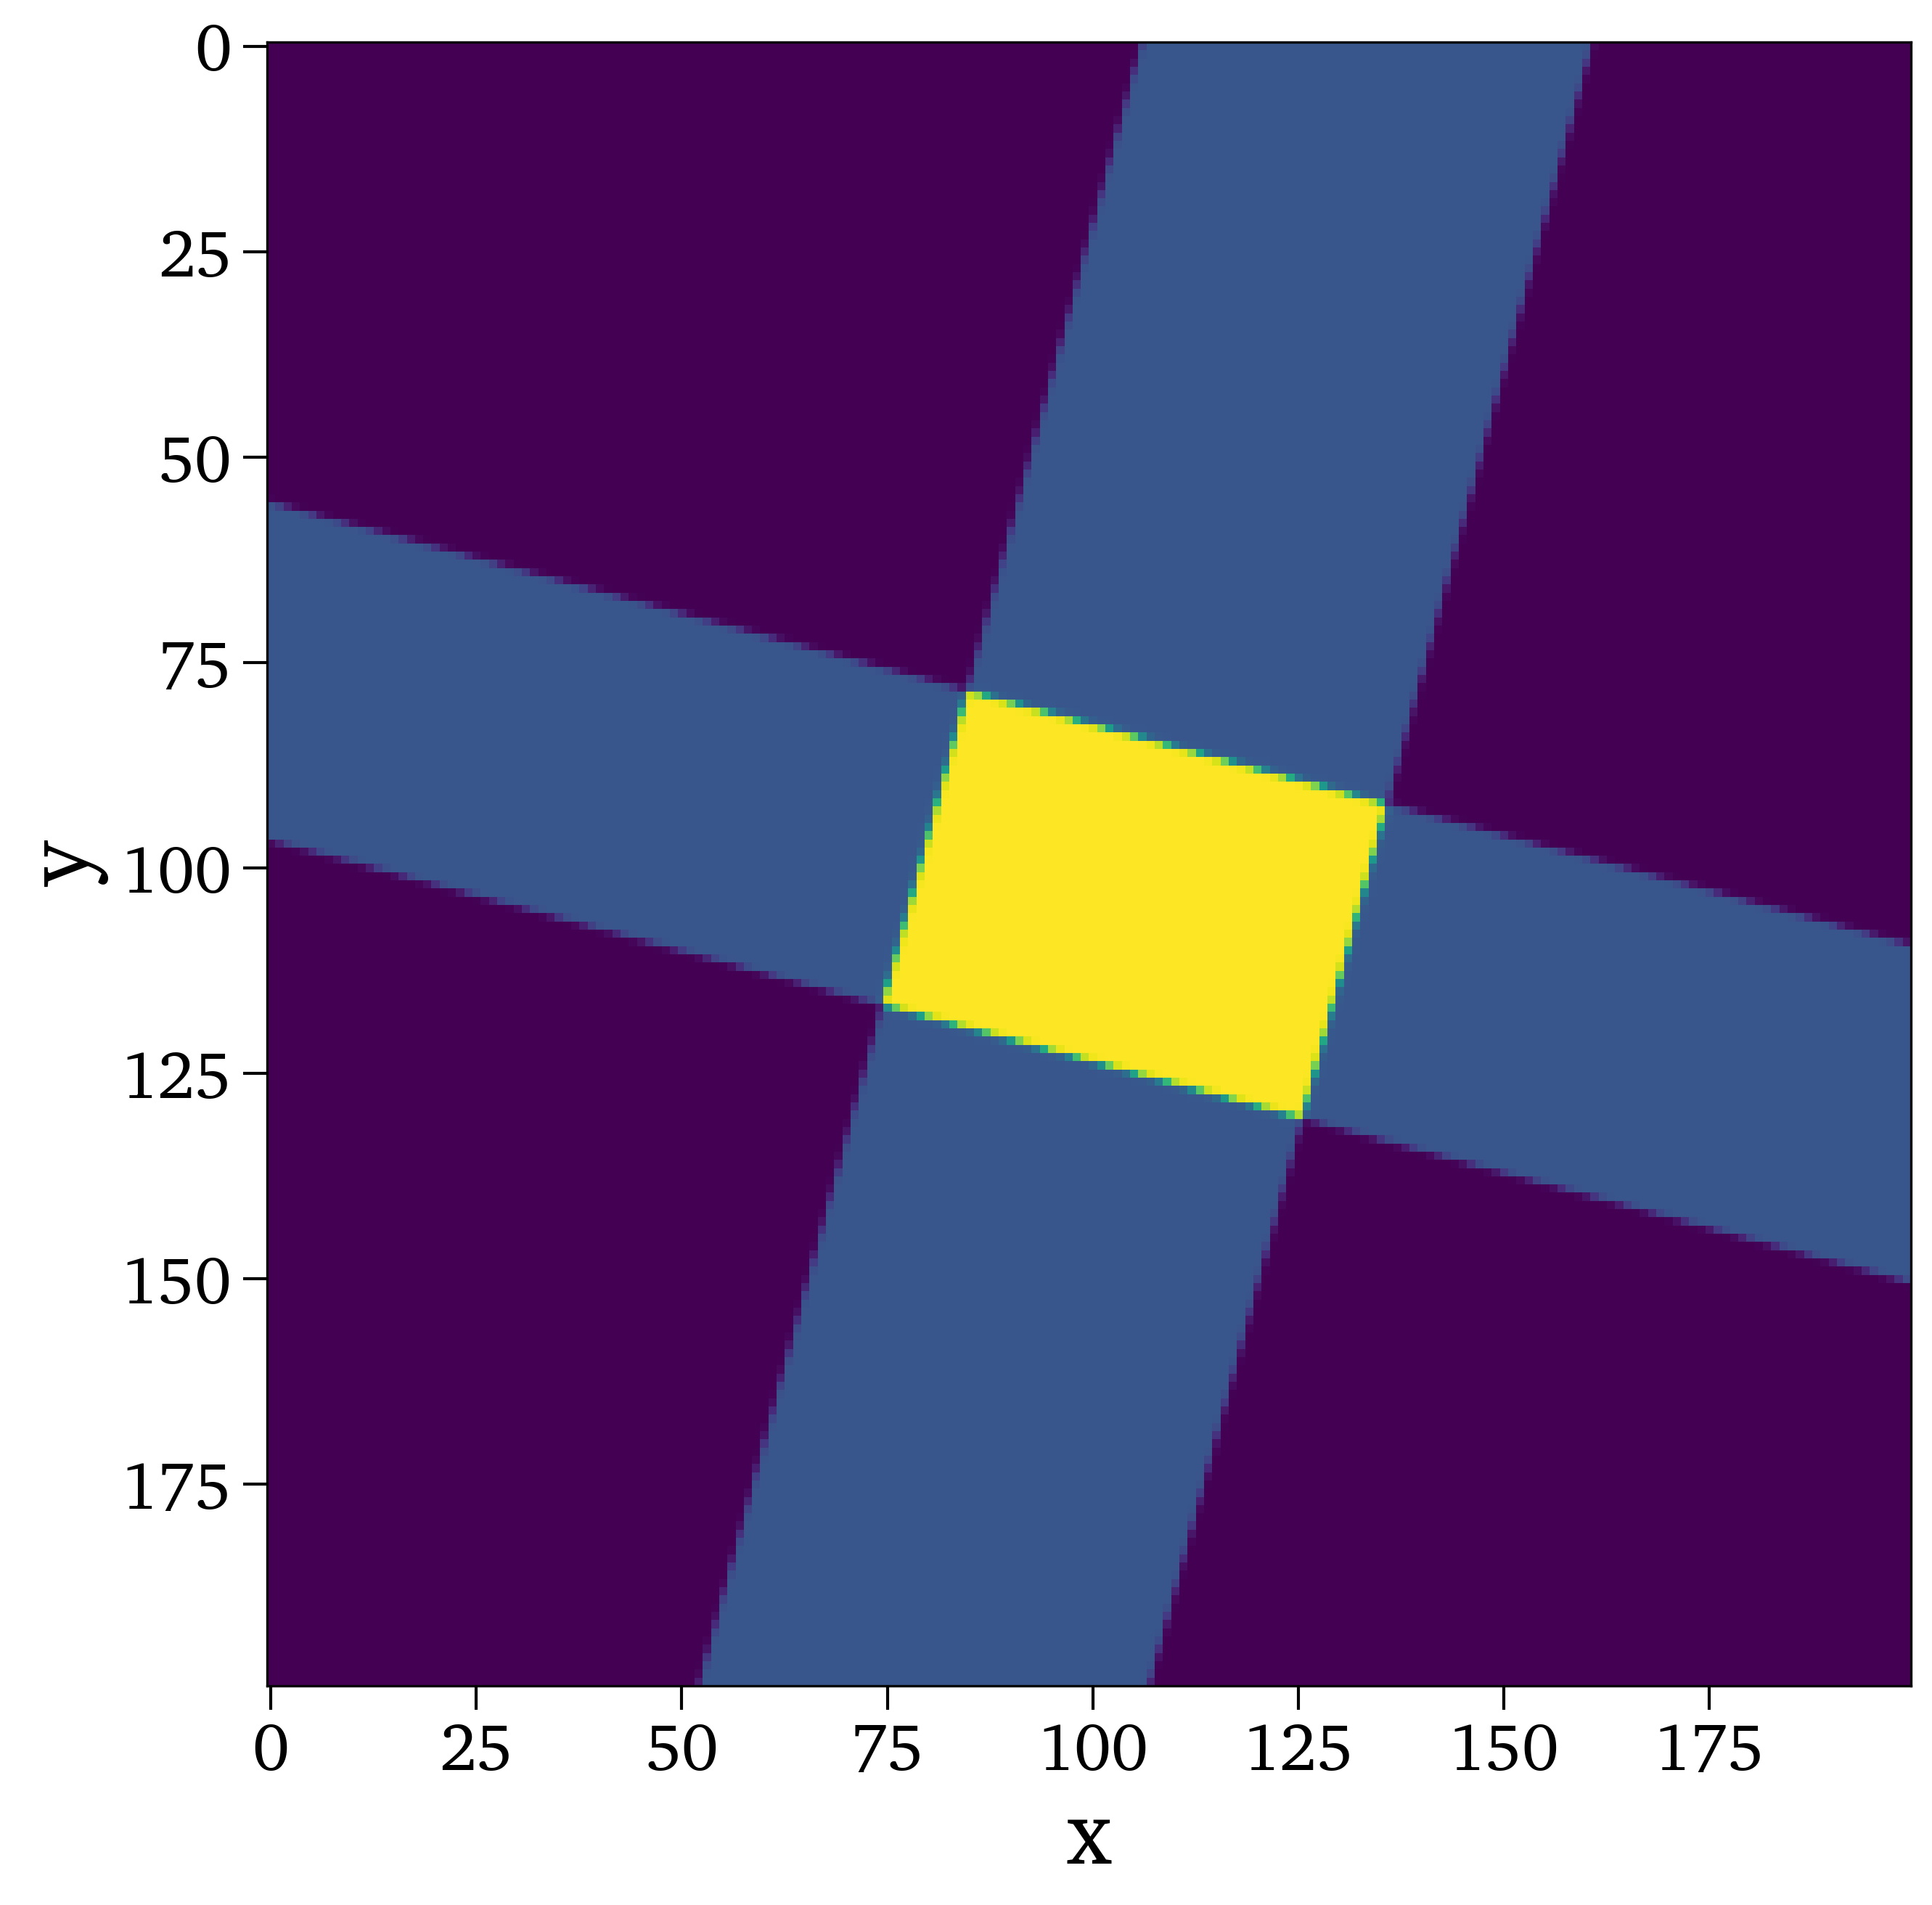

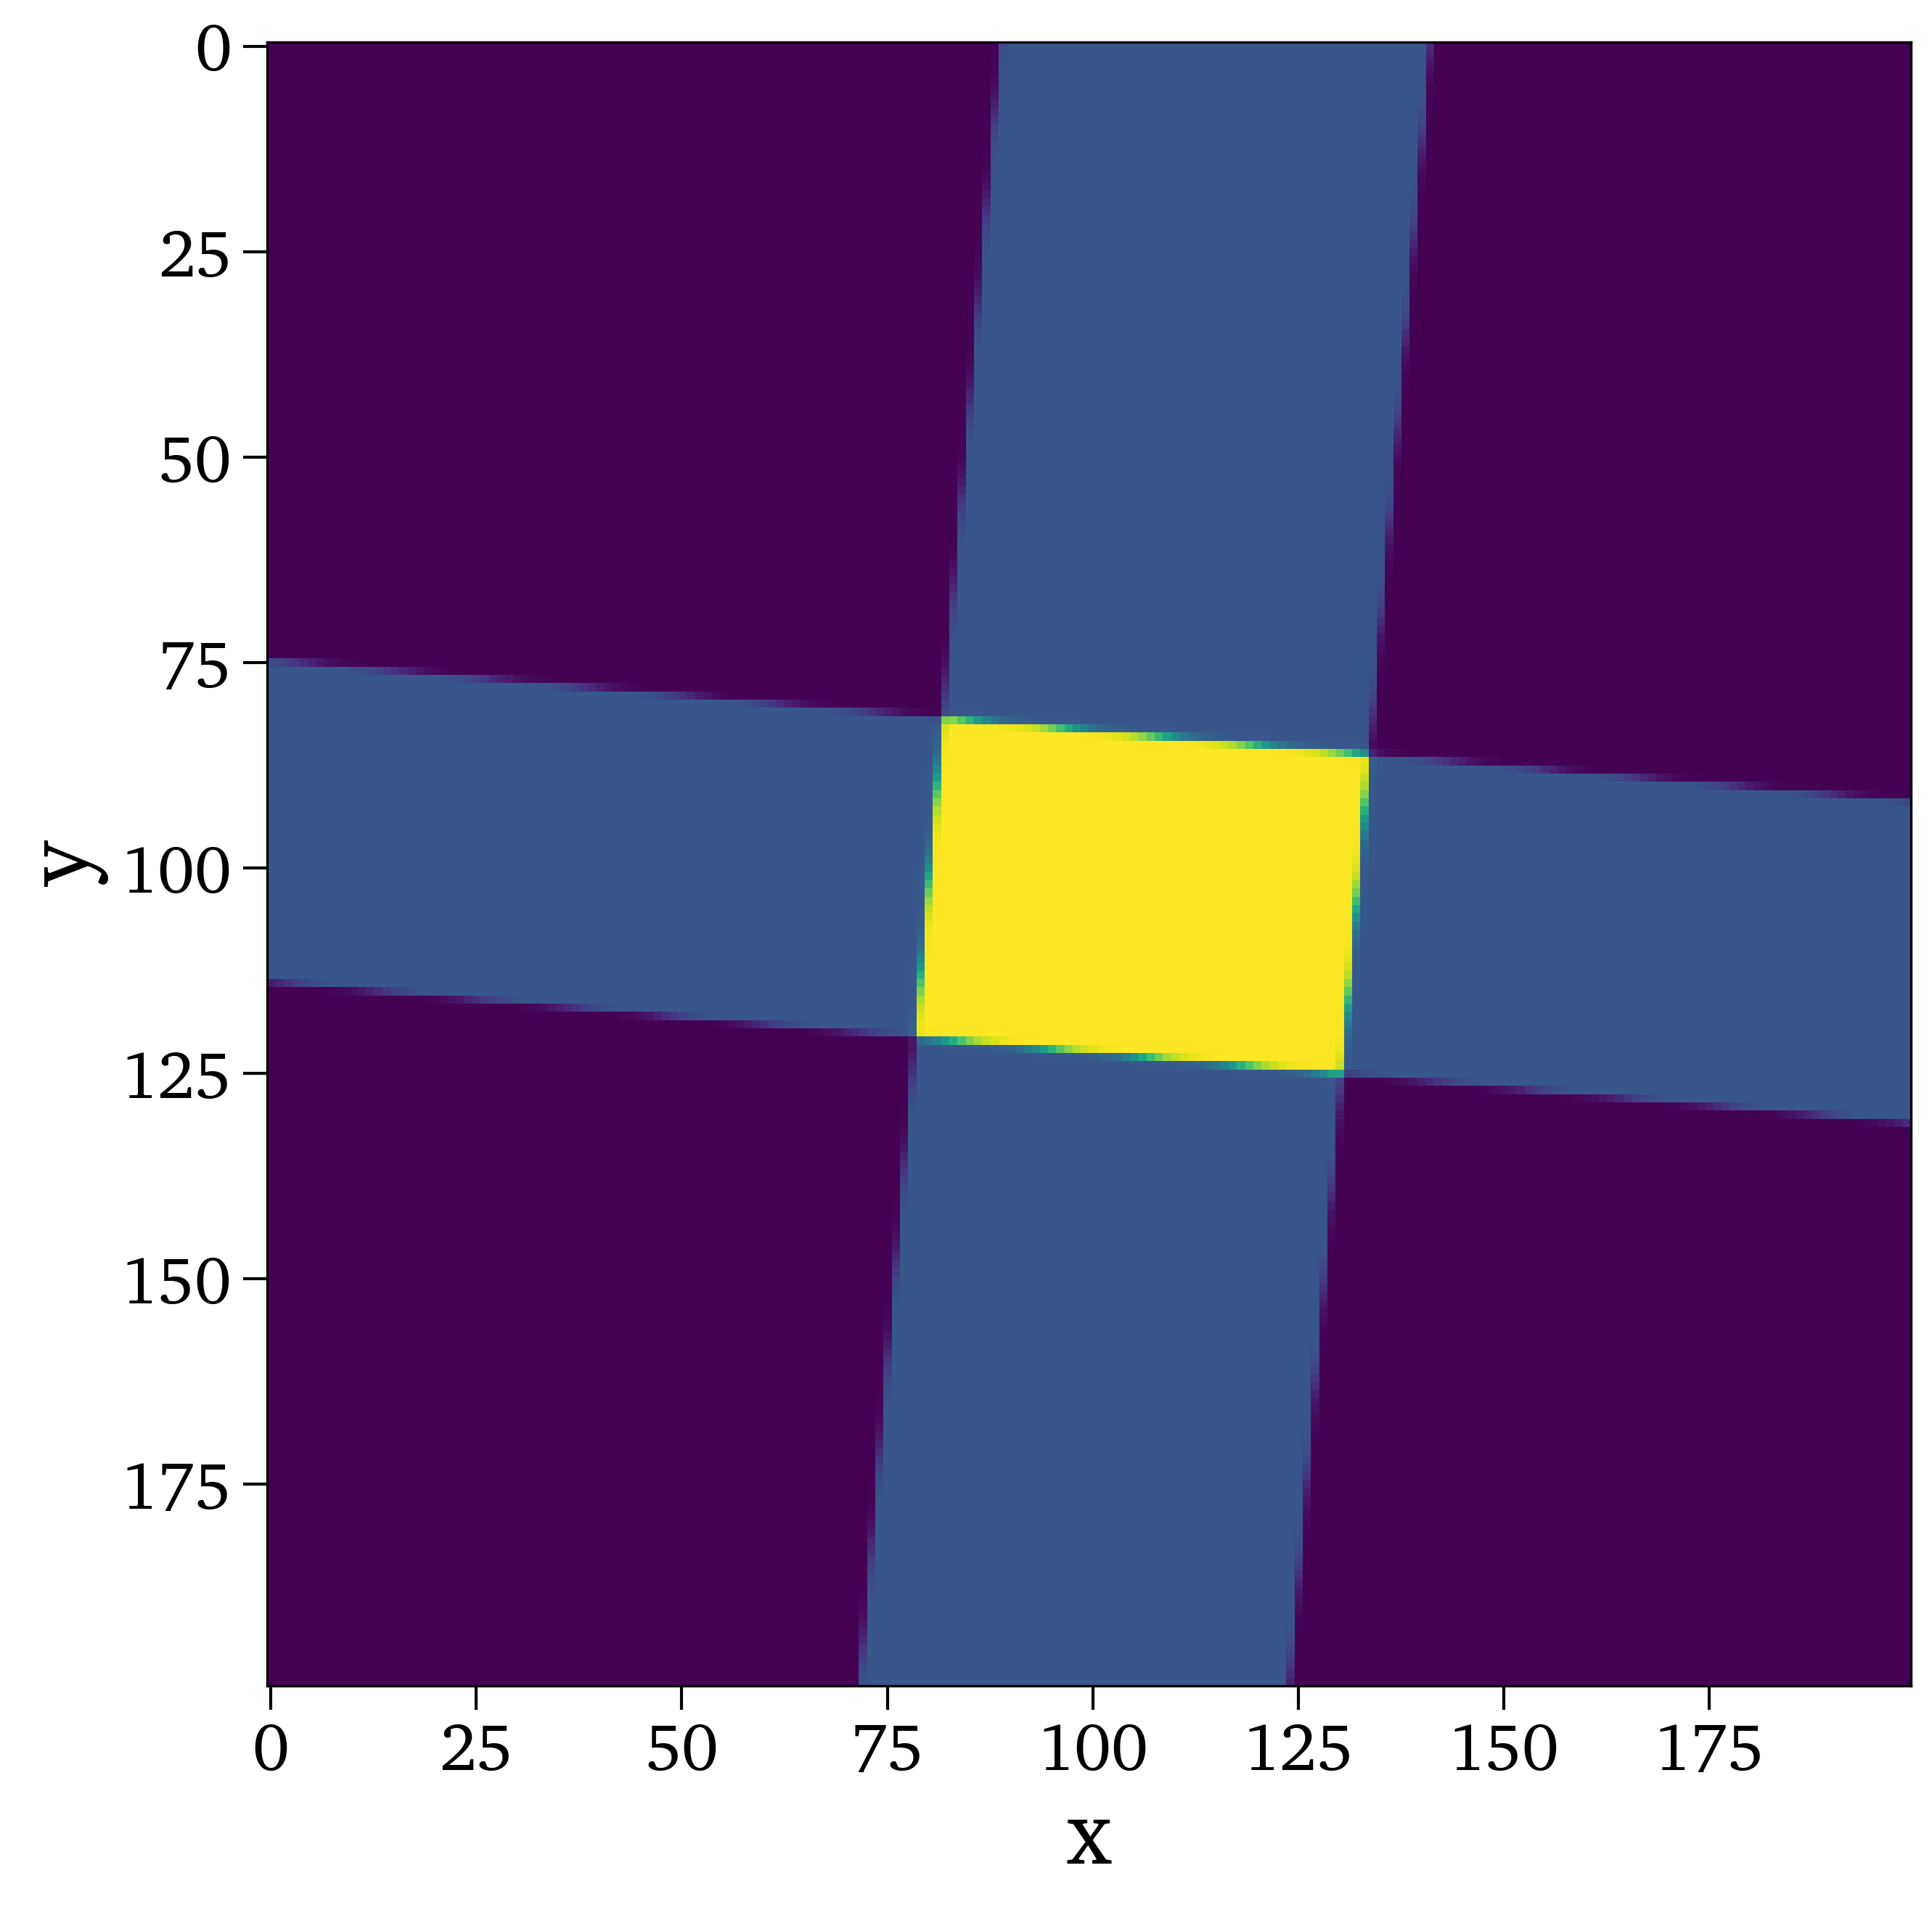

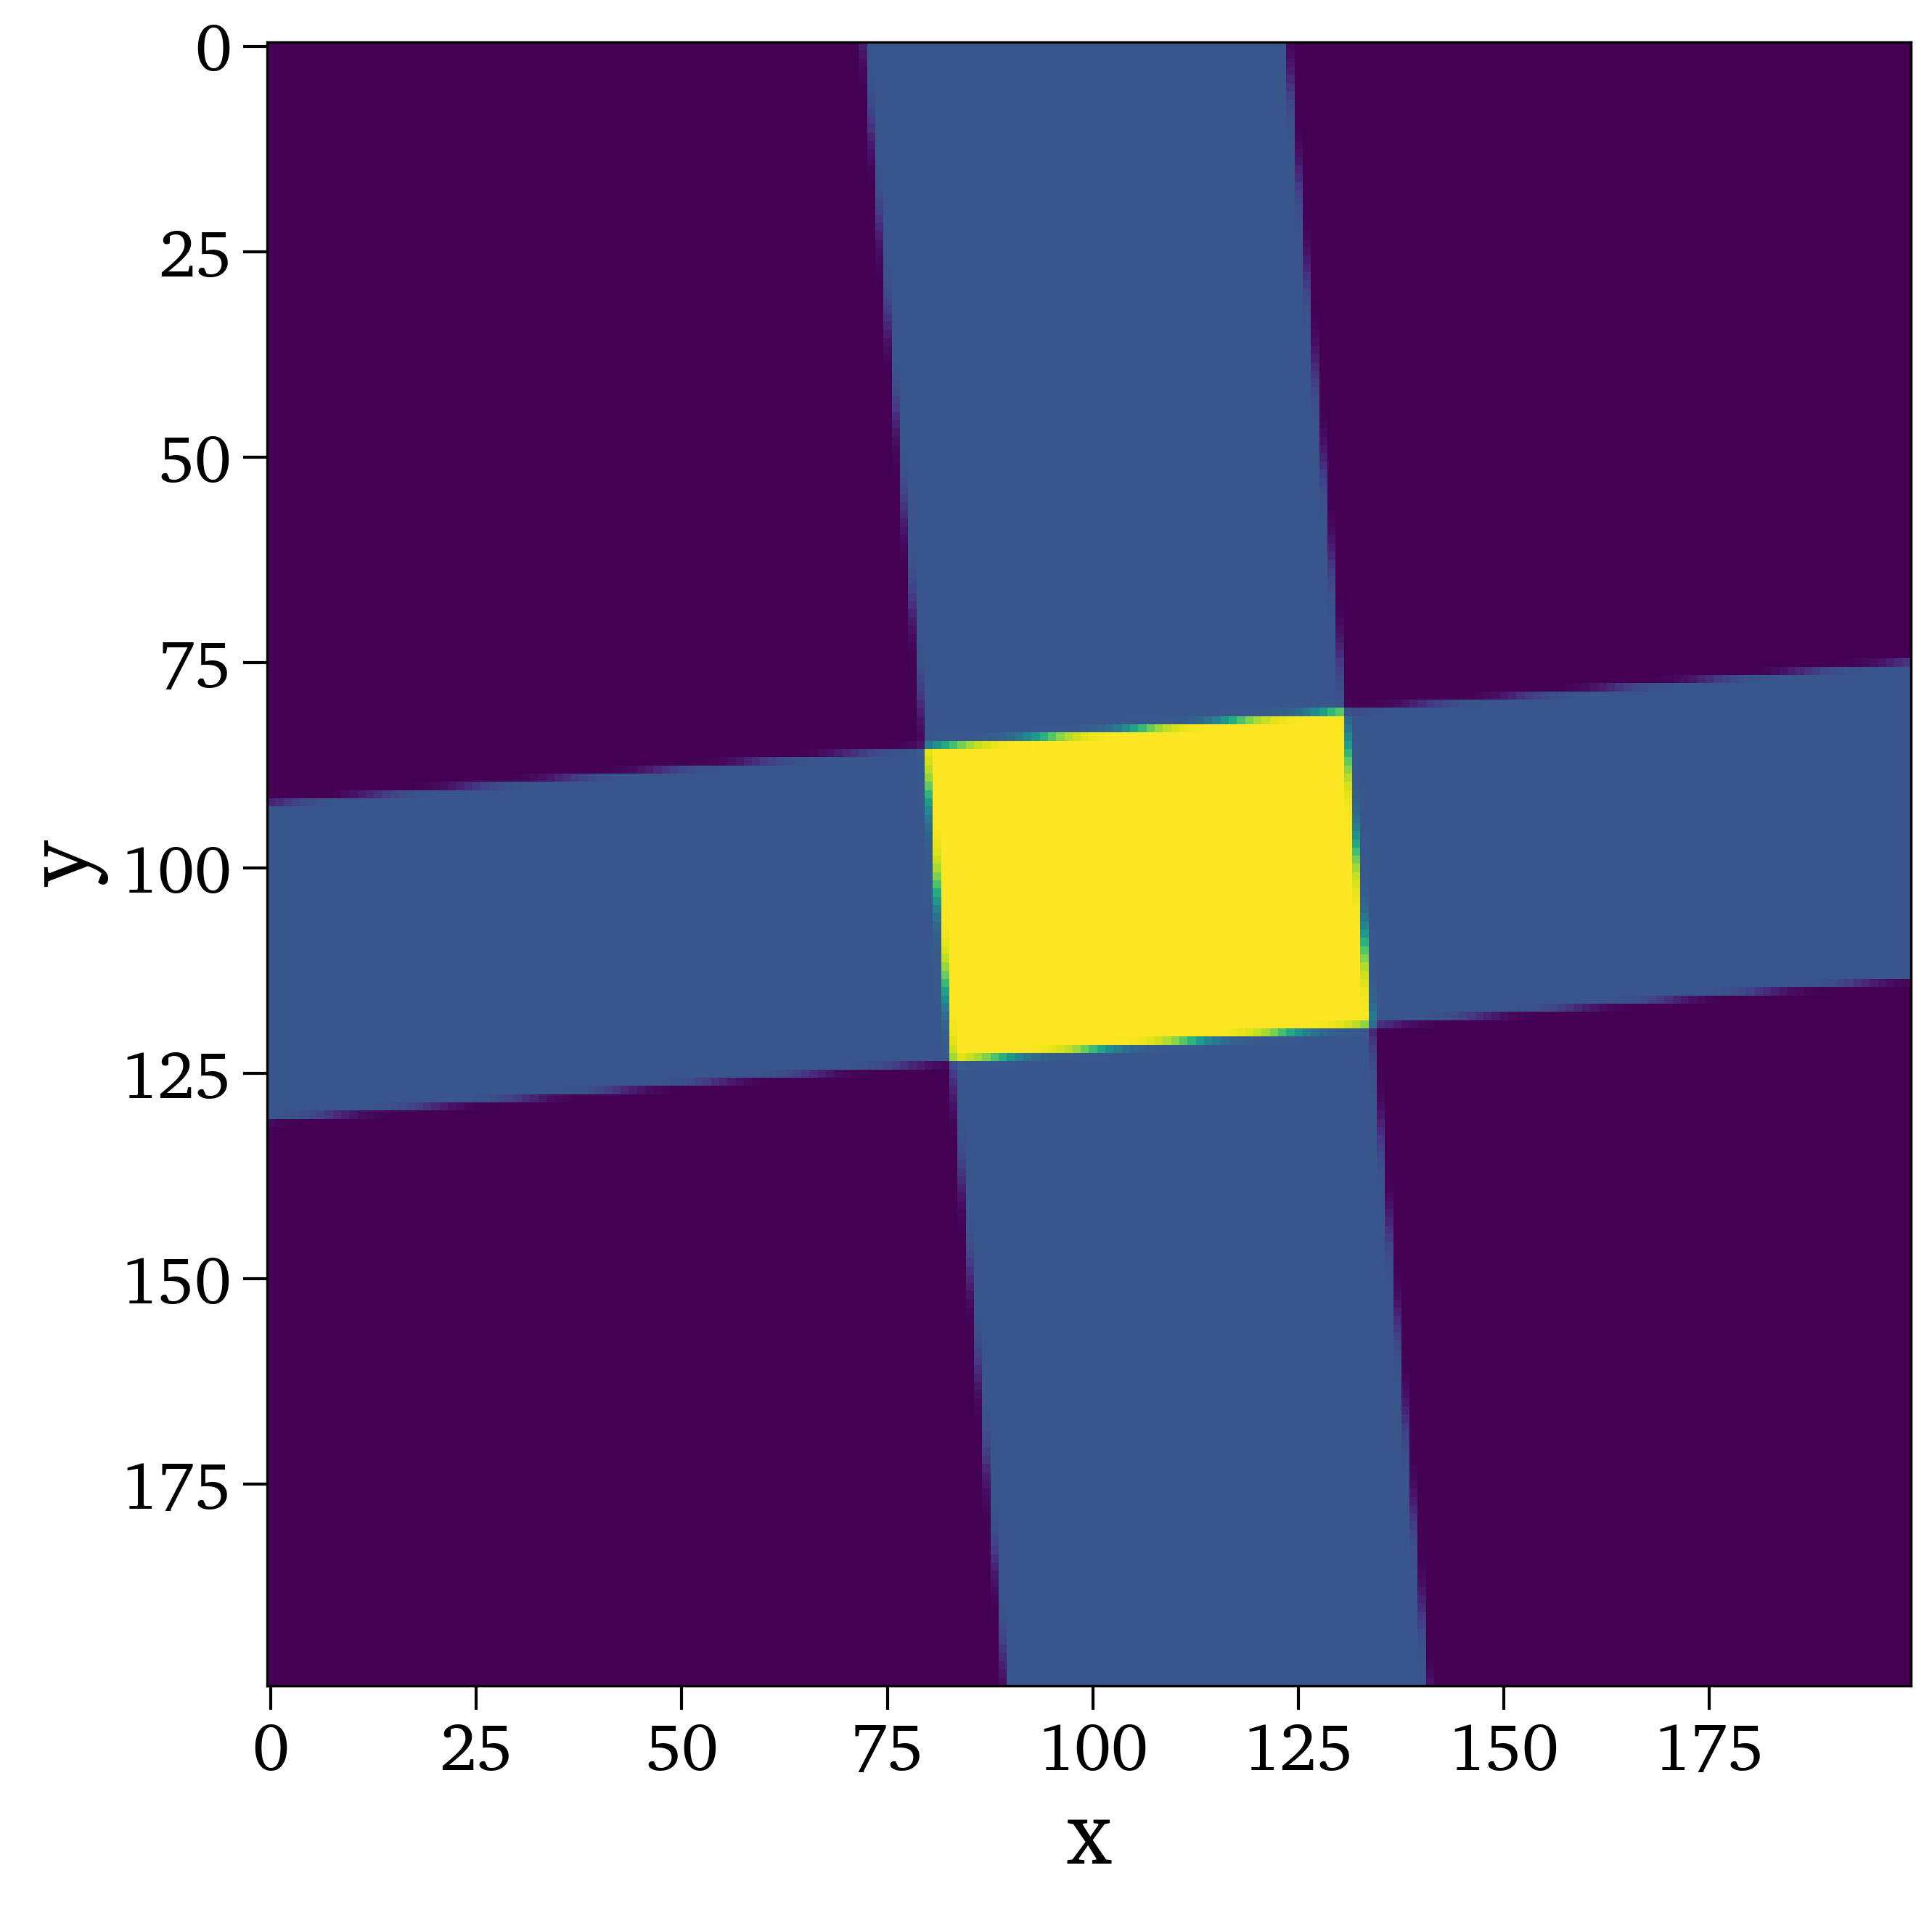

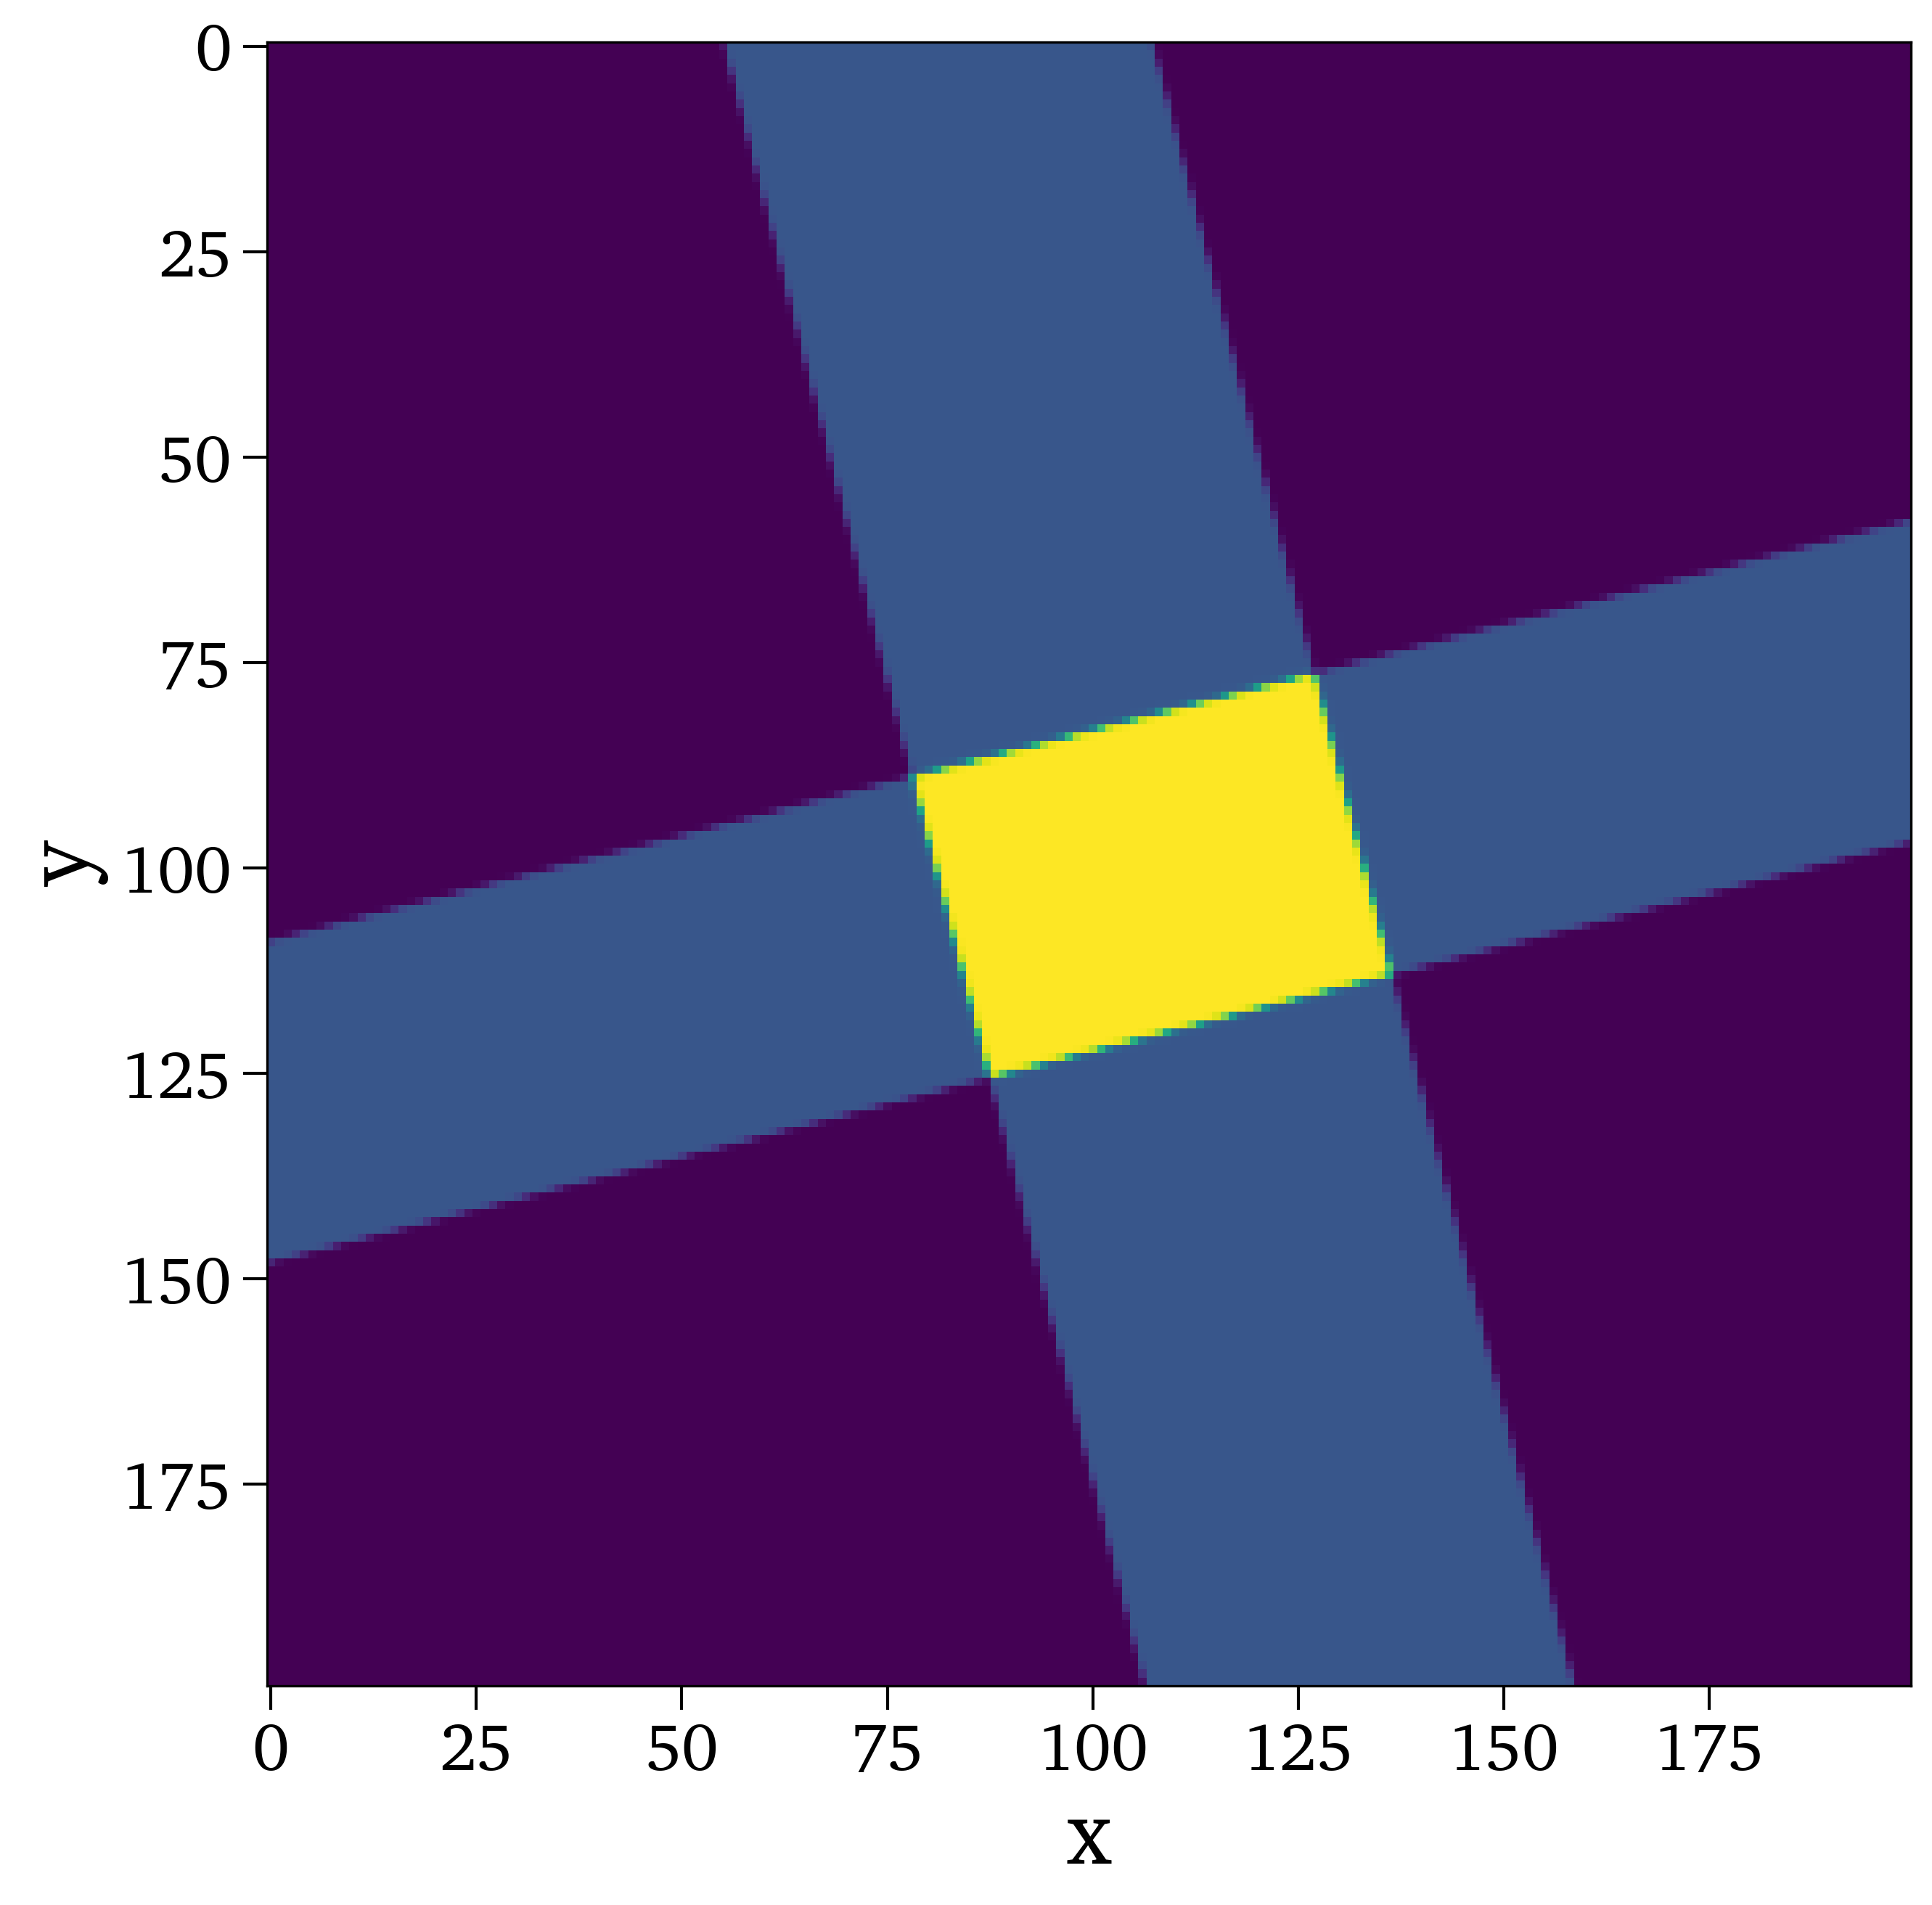

In [72]:
plt.style.use(os.path.join(WORKSPACE_PATH, 'ROMNet/romnet/extra/postprocessing/heavy.mplstyle'))
import matplotlib.pyplot                 as plt
import matplotlib.cm                     as cm
import matplotlib.animation              as animation

Nx      = 200
Ny      = 200

t0      = 4.5
tEnd    = 5.5
Nt      = 4
    
tVec    = np.linspace(t0,tEnd,Nt)
for it, t in enumerate(tVec):
    print('t=',t)
 
    
    fig = plt.figure()
    plt.imshow((zMat[:,it]).reshape(Nx,Ny))#, origin='lower', cmap=cm.turbo, extent=([xVec.min(), xVec.max(), yVec.min(), yVec.max]))
    plt.xlabel('x')
    plt.ylabel('y')
    #plt.savefig(path_to_run_fld+'/Figures/XRec_t'+str(t)+'_Orig.pdf', format='pdf', bbox_inches='tight')
   

## Estimating the Required Number of Singular Values

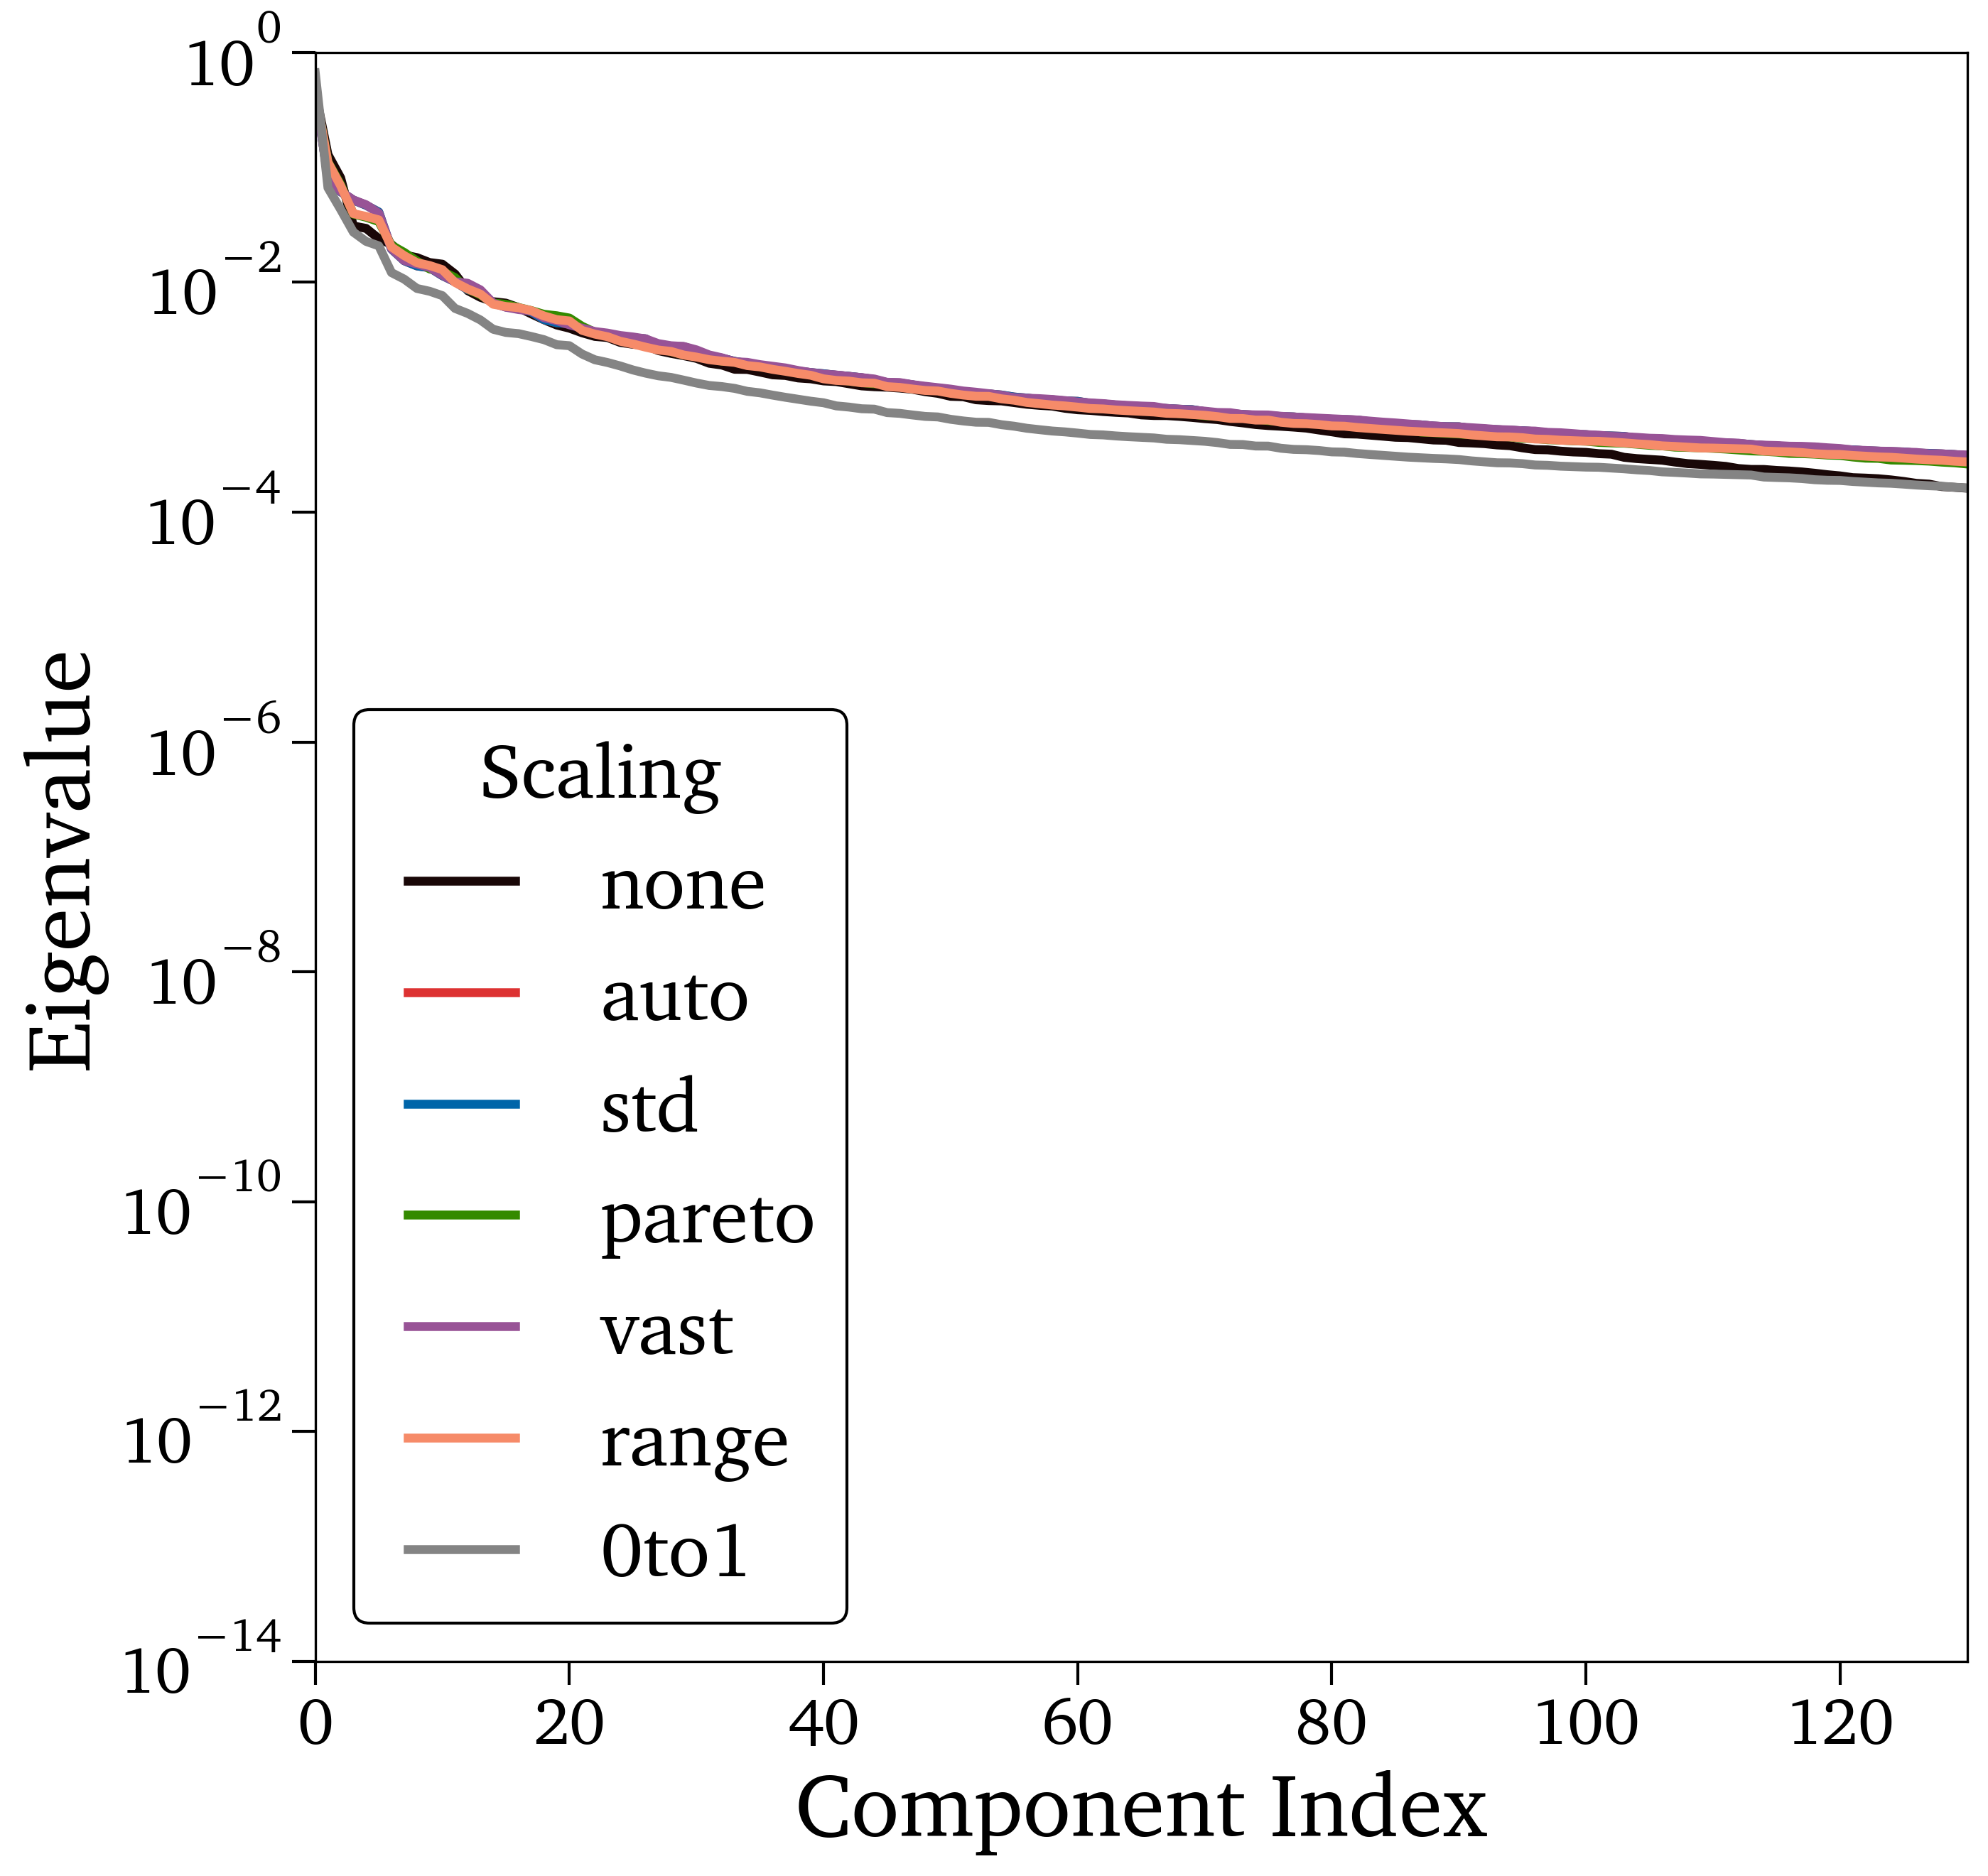

In [75]:
n_modes    = 64
ScalingVec = ['none', 'auto', 'std', 'pareto', 'vast', 'range', '0to1']
             # options: 'none', '', 'auto', 'std', 'pareto', 'vast', 'range', '0to1', '-1to1', 'level', 'max', 'poisson', 'vast_2', 'vast_3', 'vast_4'

fig, ax1 = plt.subplots()
#fig, ax2 = plt.subplots()
for j, Scaling in enumerate(ScalingVec):

    pca        = PCAA(zMat, scaling=Scaling, n_components=int(n_modes))
    C          = pca.X_center
    D          = pca.X_scale
    A          = pca.A[:,0:n_modes].T
    L          = pca.L
    AT         = A.T

    ax1.plot(L, label=Scaling)
    #ax2.plot(np.cumsum(L**2)/np.cumsum(L**2)[-1])
    
ax1.set_ylim([1.e-14, 1.e0])
ax1.set_xlabel('Component Index')
ax1.set_ylabel('Eigenvalue')
ax1.set_yscale('log')
ax1.legend(title='Scaling')
ax1.set_xlim([0,130])

# ax2.set_ylim([0.0, 1.e0])
# ax2.set_xlabel('Component Index')
# ax2.set_ylabel('Eigenvalue')
# ax2.legend()
# ax2.set_xlim([0,10])

if (FigDir):
    plt.savefig(FigDir+'/MSD_Eigenvalues_OneByOne_'+Vars[iVar]+'.eps', format='eps', bbox_inches='tight')

## Preserving the first $n_{modesFinal}$ Singular Values and Saving the Related Matrixes/Vectors

In [91]:
n_modesFinal = 128

pca        = PCAA(zMat, scaling='none', n_components=n_modesFinal, nocenter=False)
C          = pca.X_center
D          = pca.X_scale
A          = pca.A[:,0:n_modesFinal].T
L          = pca.L
AT         = A.T
yMat_Scaled= ((zMat - C)/D)
print('[PCA] Shape of A        = ', A.shape)
print('[PCA] ')

[PCA] Shape of A        =  (128, 200)
[PCA] 


### Reduction Error Estimate

In [92]:
#yMat_pca    = pca.transform(yMat, nocenter=False)
zMat_pca   = ((zMat - C)/D).dot(AT)

zMat_      = (zMat_pca.dot(A))*D + C
print('[PCA] Shape of yMat_pca = ', zMat_pca.shape)
print('[PCA]  Max % Error = ', np.max(abs((zMat - zMat_)/zMat)*100))
print('[PCA]  Max      SE = ', np.max((zMat - zMat_)**2))
print('[PCA] Mean % Error = ', np.mean(abs((zMat - zMat_)/zMat)*100))
print('[PCA]          MSE = ', np.mean((zMat - zMat_)**2))

[PCA] Shape of yMat_pca =  (40000, 128)
[PCA]  Max % Error =  357.77093467626275
[PCA]  Max      SE =  37.21673847909766
[PCA] Mean % Error =  6.140526403376035
[PCA]          MSE =  0.07660008339133619


### Plotting the Components of the Projection Matrix

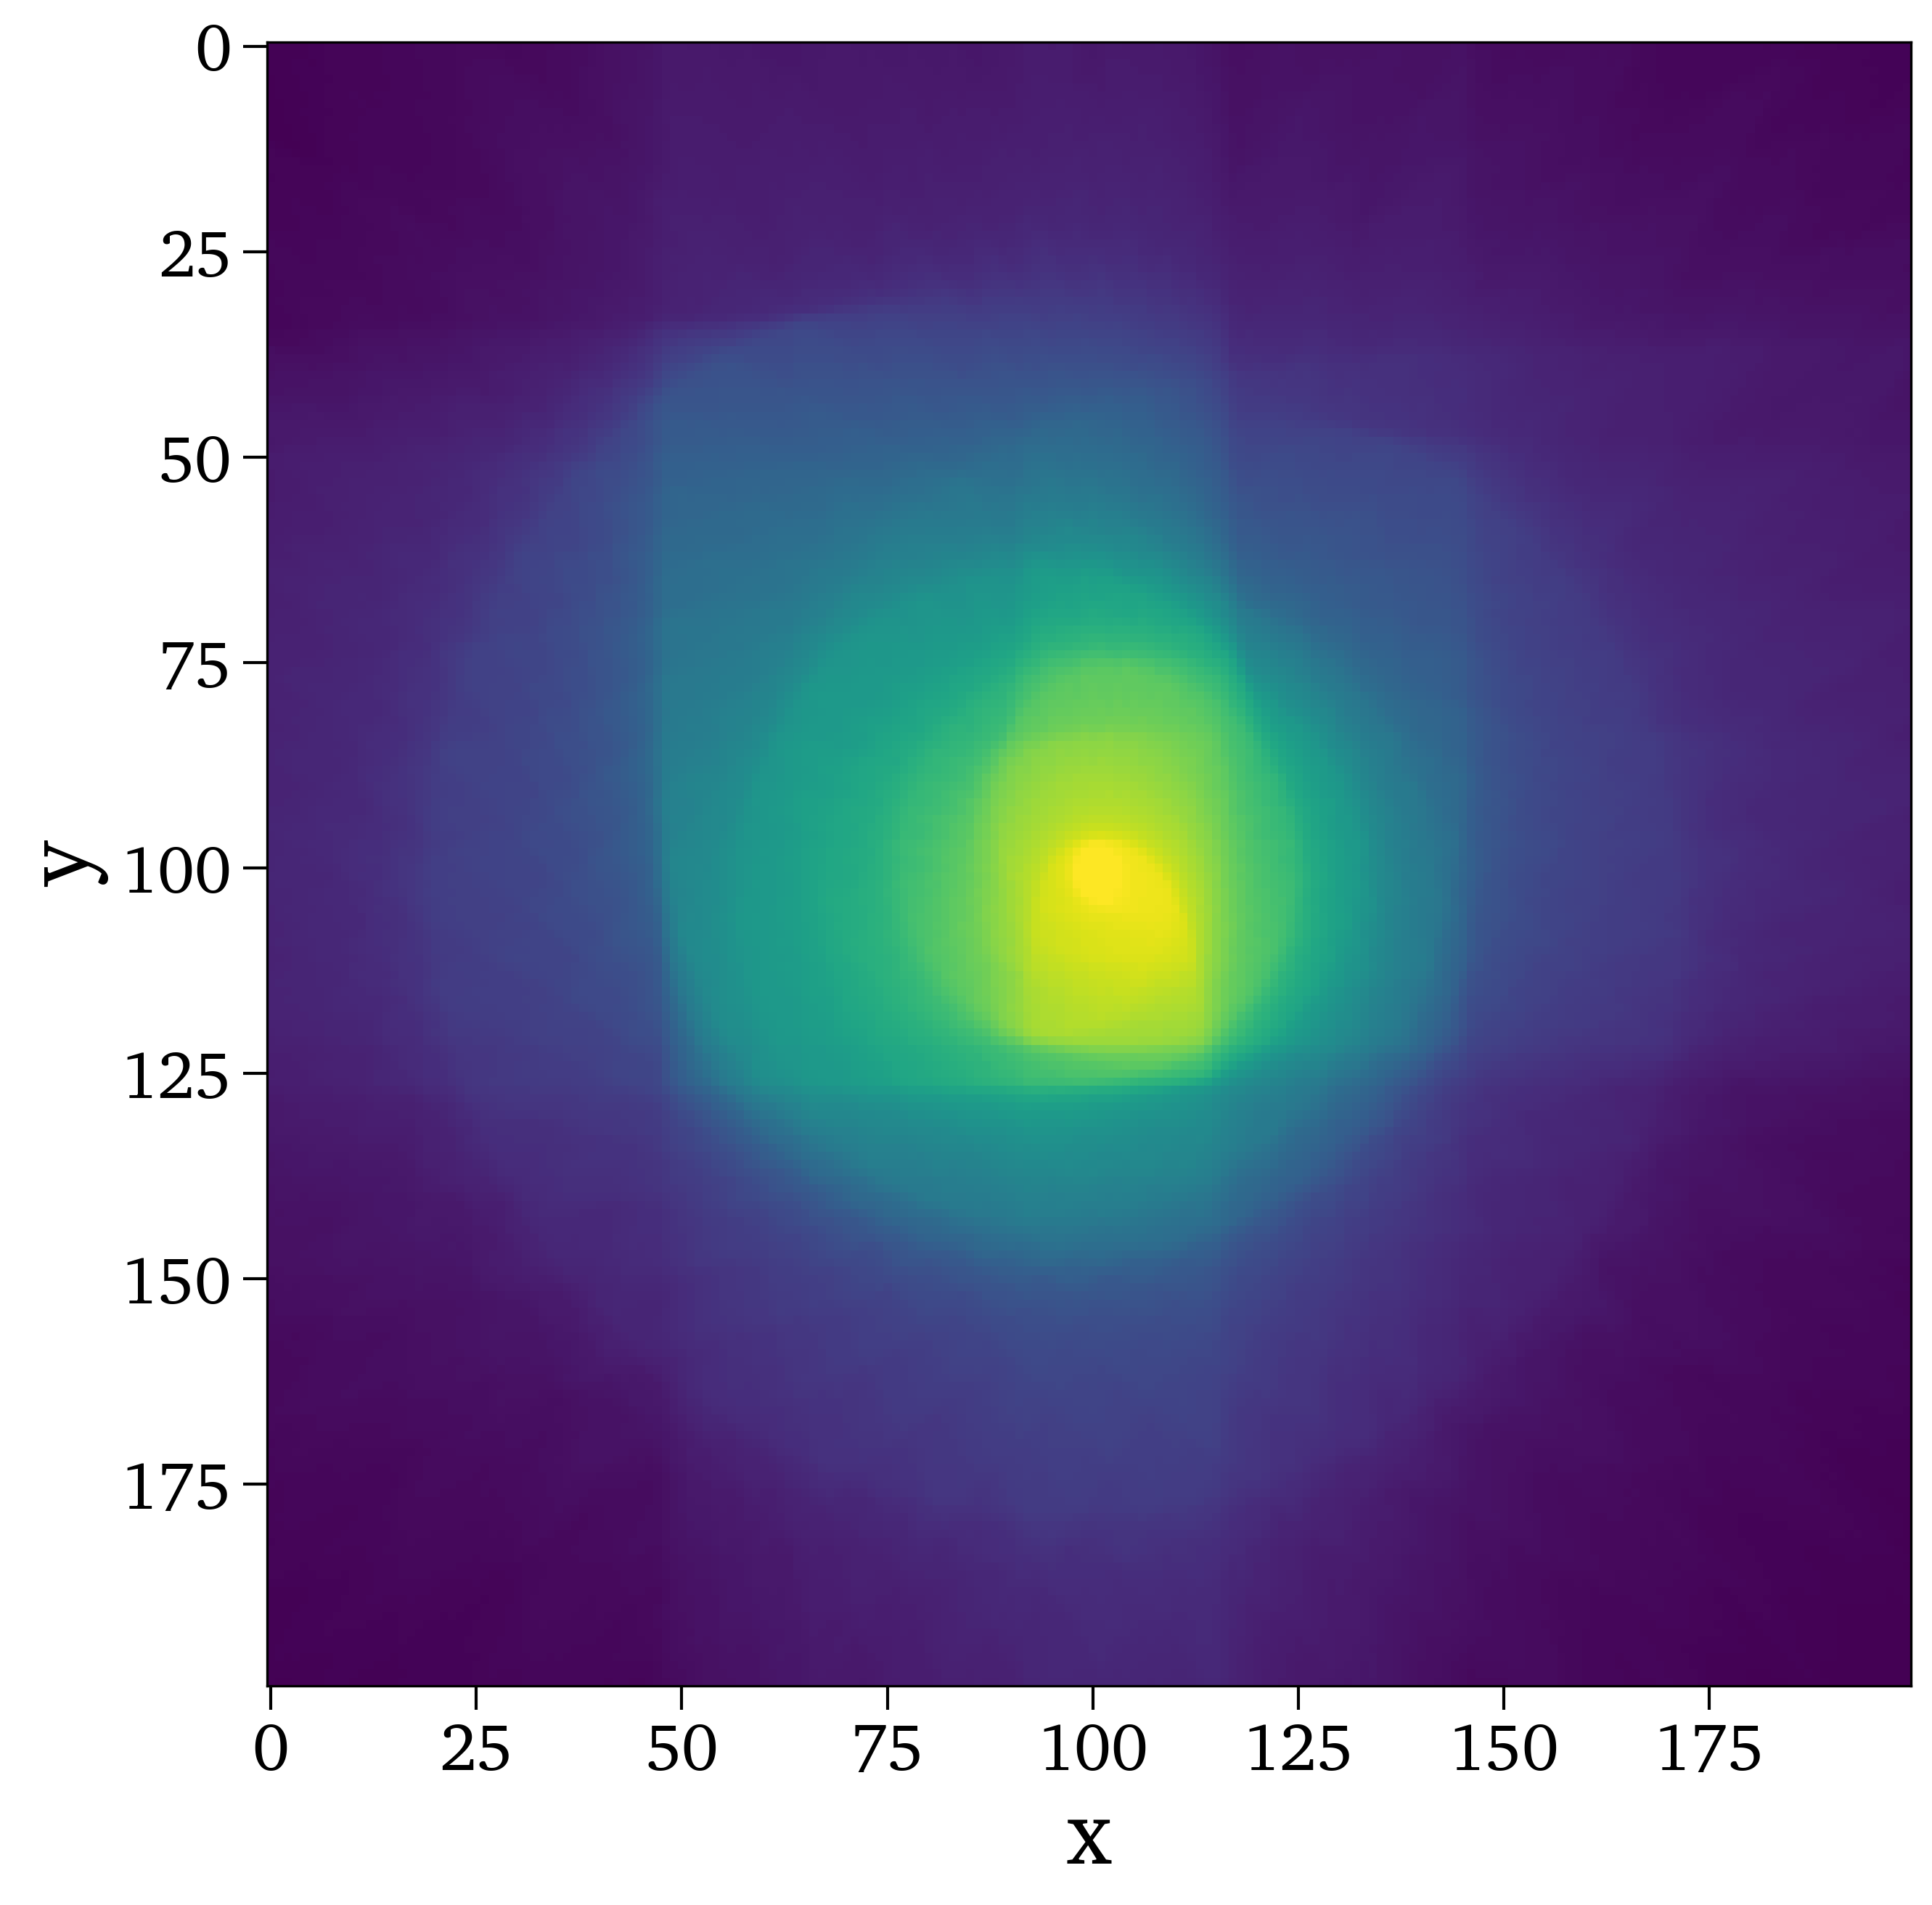

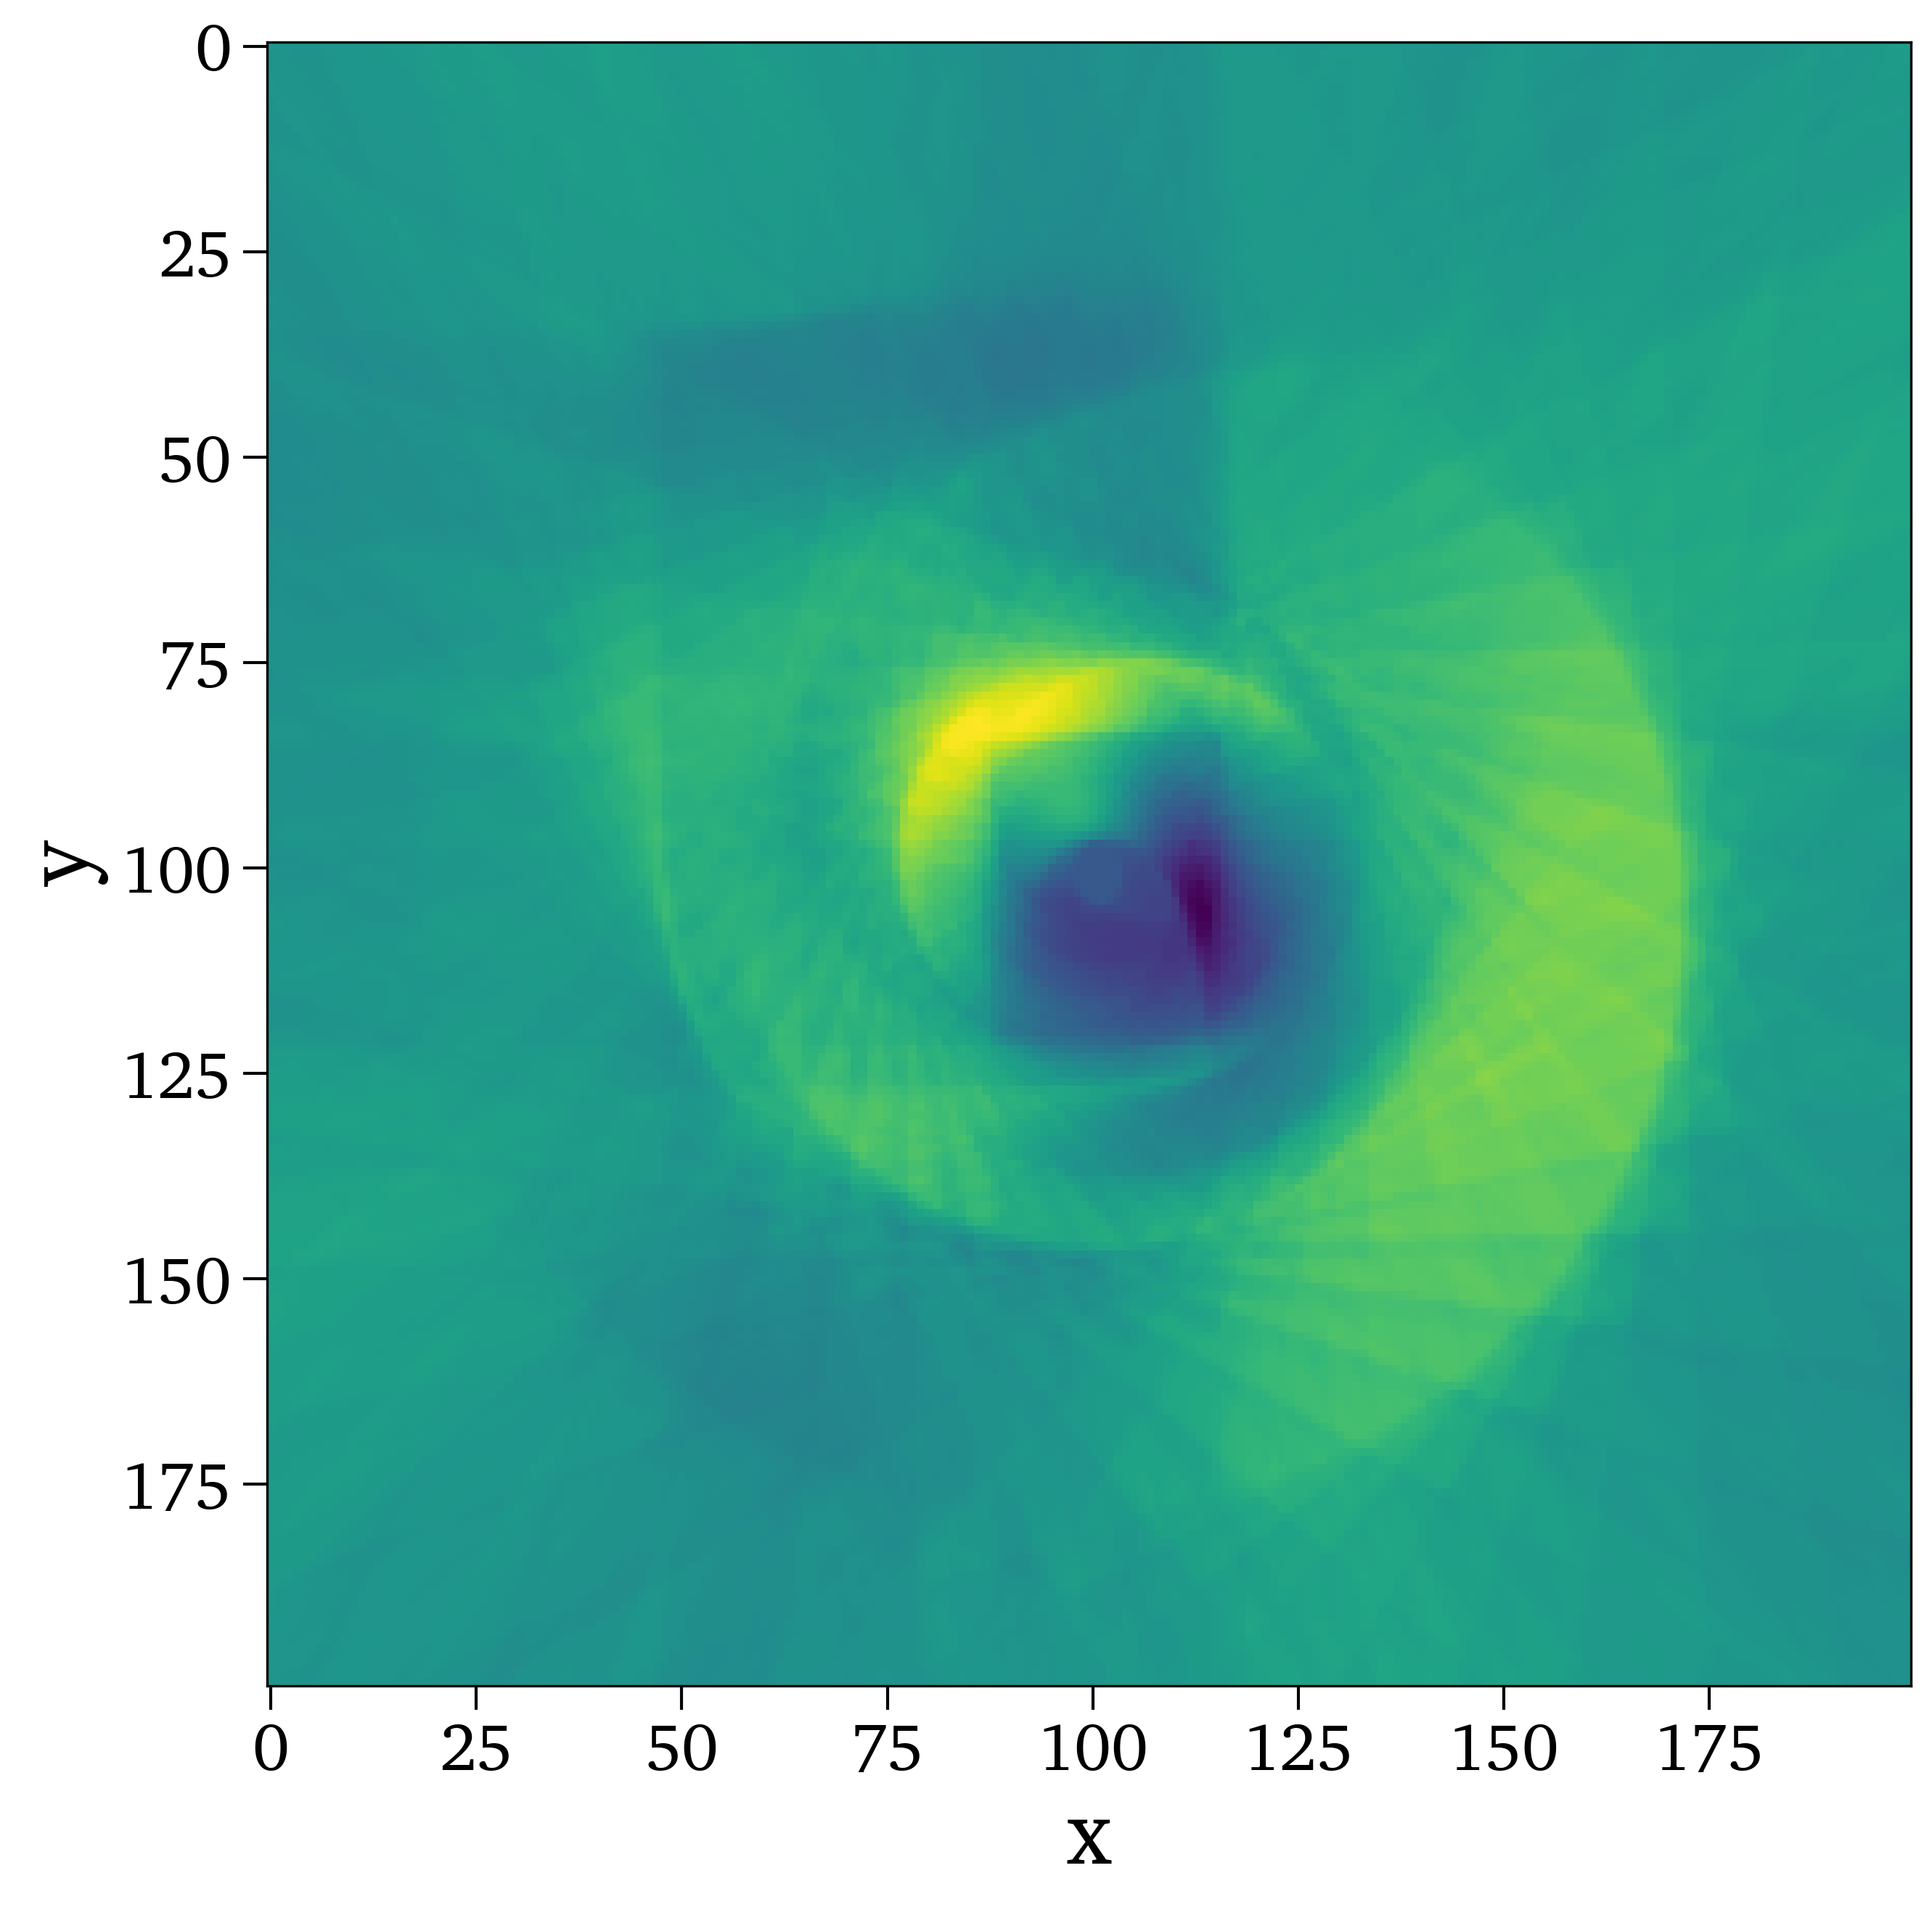

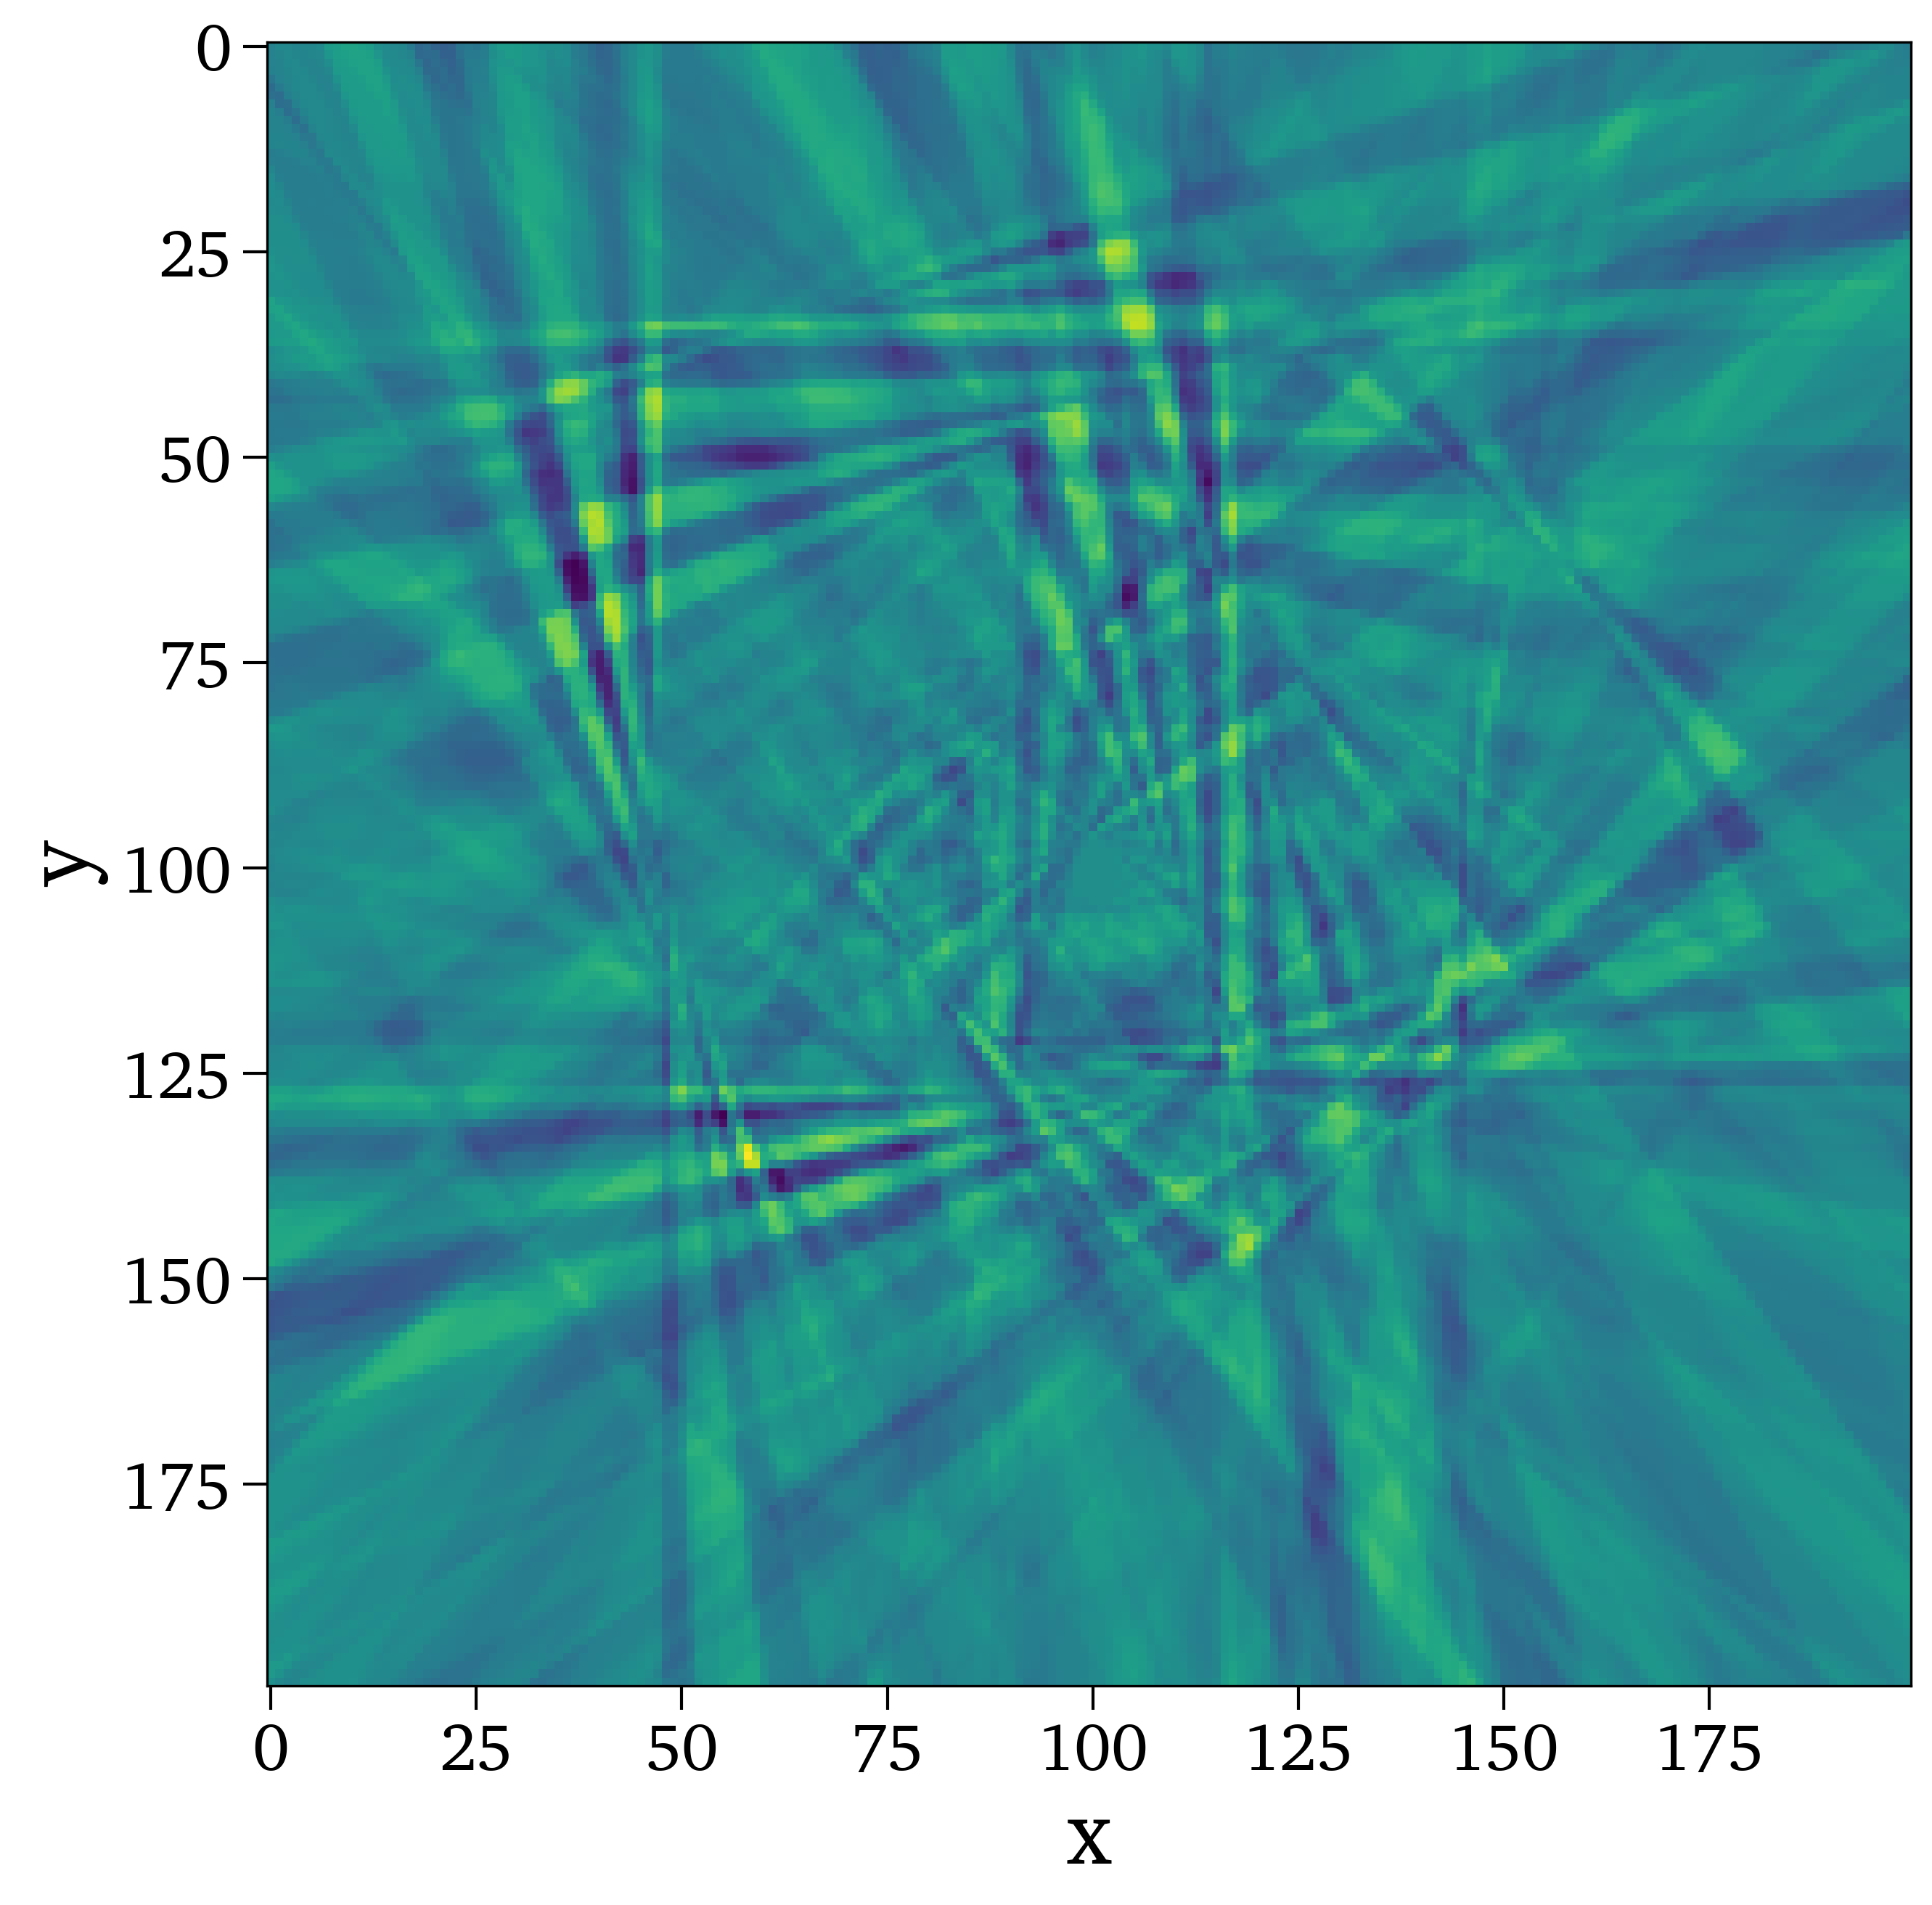

In [93]:
plt.style.use(os.path.join(WORKSPACE_PATH, 'ROMNet/romnet/extra/postprocessing/heavy.mplstyle'))
import matplotlib.pyplot                 as plt
import matplotlib.cm                     as cm
import matplotlib.animation              as animation

Nx      = 200
Ny      = 200

t0      = 4.5
tEnd    = 5.5
Nt      = 4
    
tVec    = np.linspace(t0,tEnd,Nt)
for iPC in [0,10,100]:
 
    
    fig = plt.figure()
    plt.imshow((zMat_pca[:,iPC]).reshape(Nx,Ny))#, origin='lower', cmap=cm.turbo, extent=([xVec.min(), xVec.max(), yVec.min(), yVec.max]))
    plt.xlabel('x')
    plt.ylabel('y')
    #plt.savefig(path_to_run_fld+'/Figures/XRec_t'+str(t)+'_Orig.pdf', format='pdf', bbox_inches='tight')

t= 4.5
t= 4.833333333333333
t= 5.166666666666667
t= 5.5


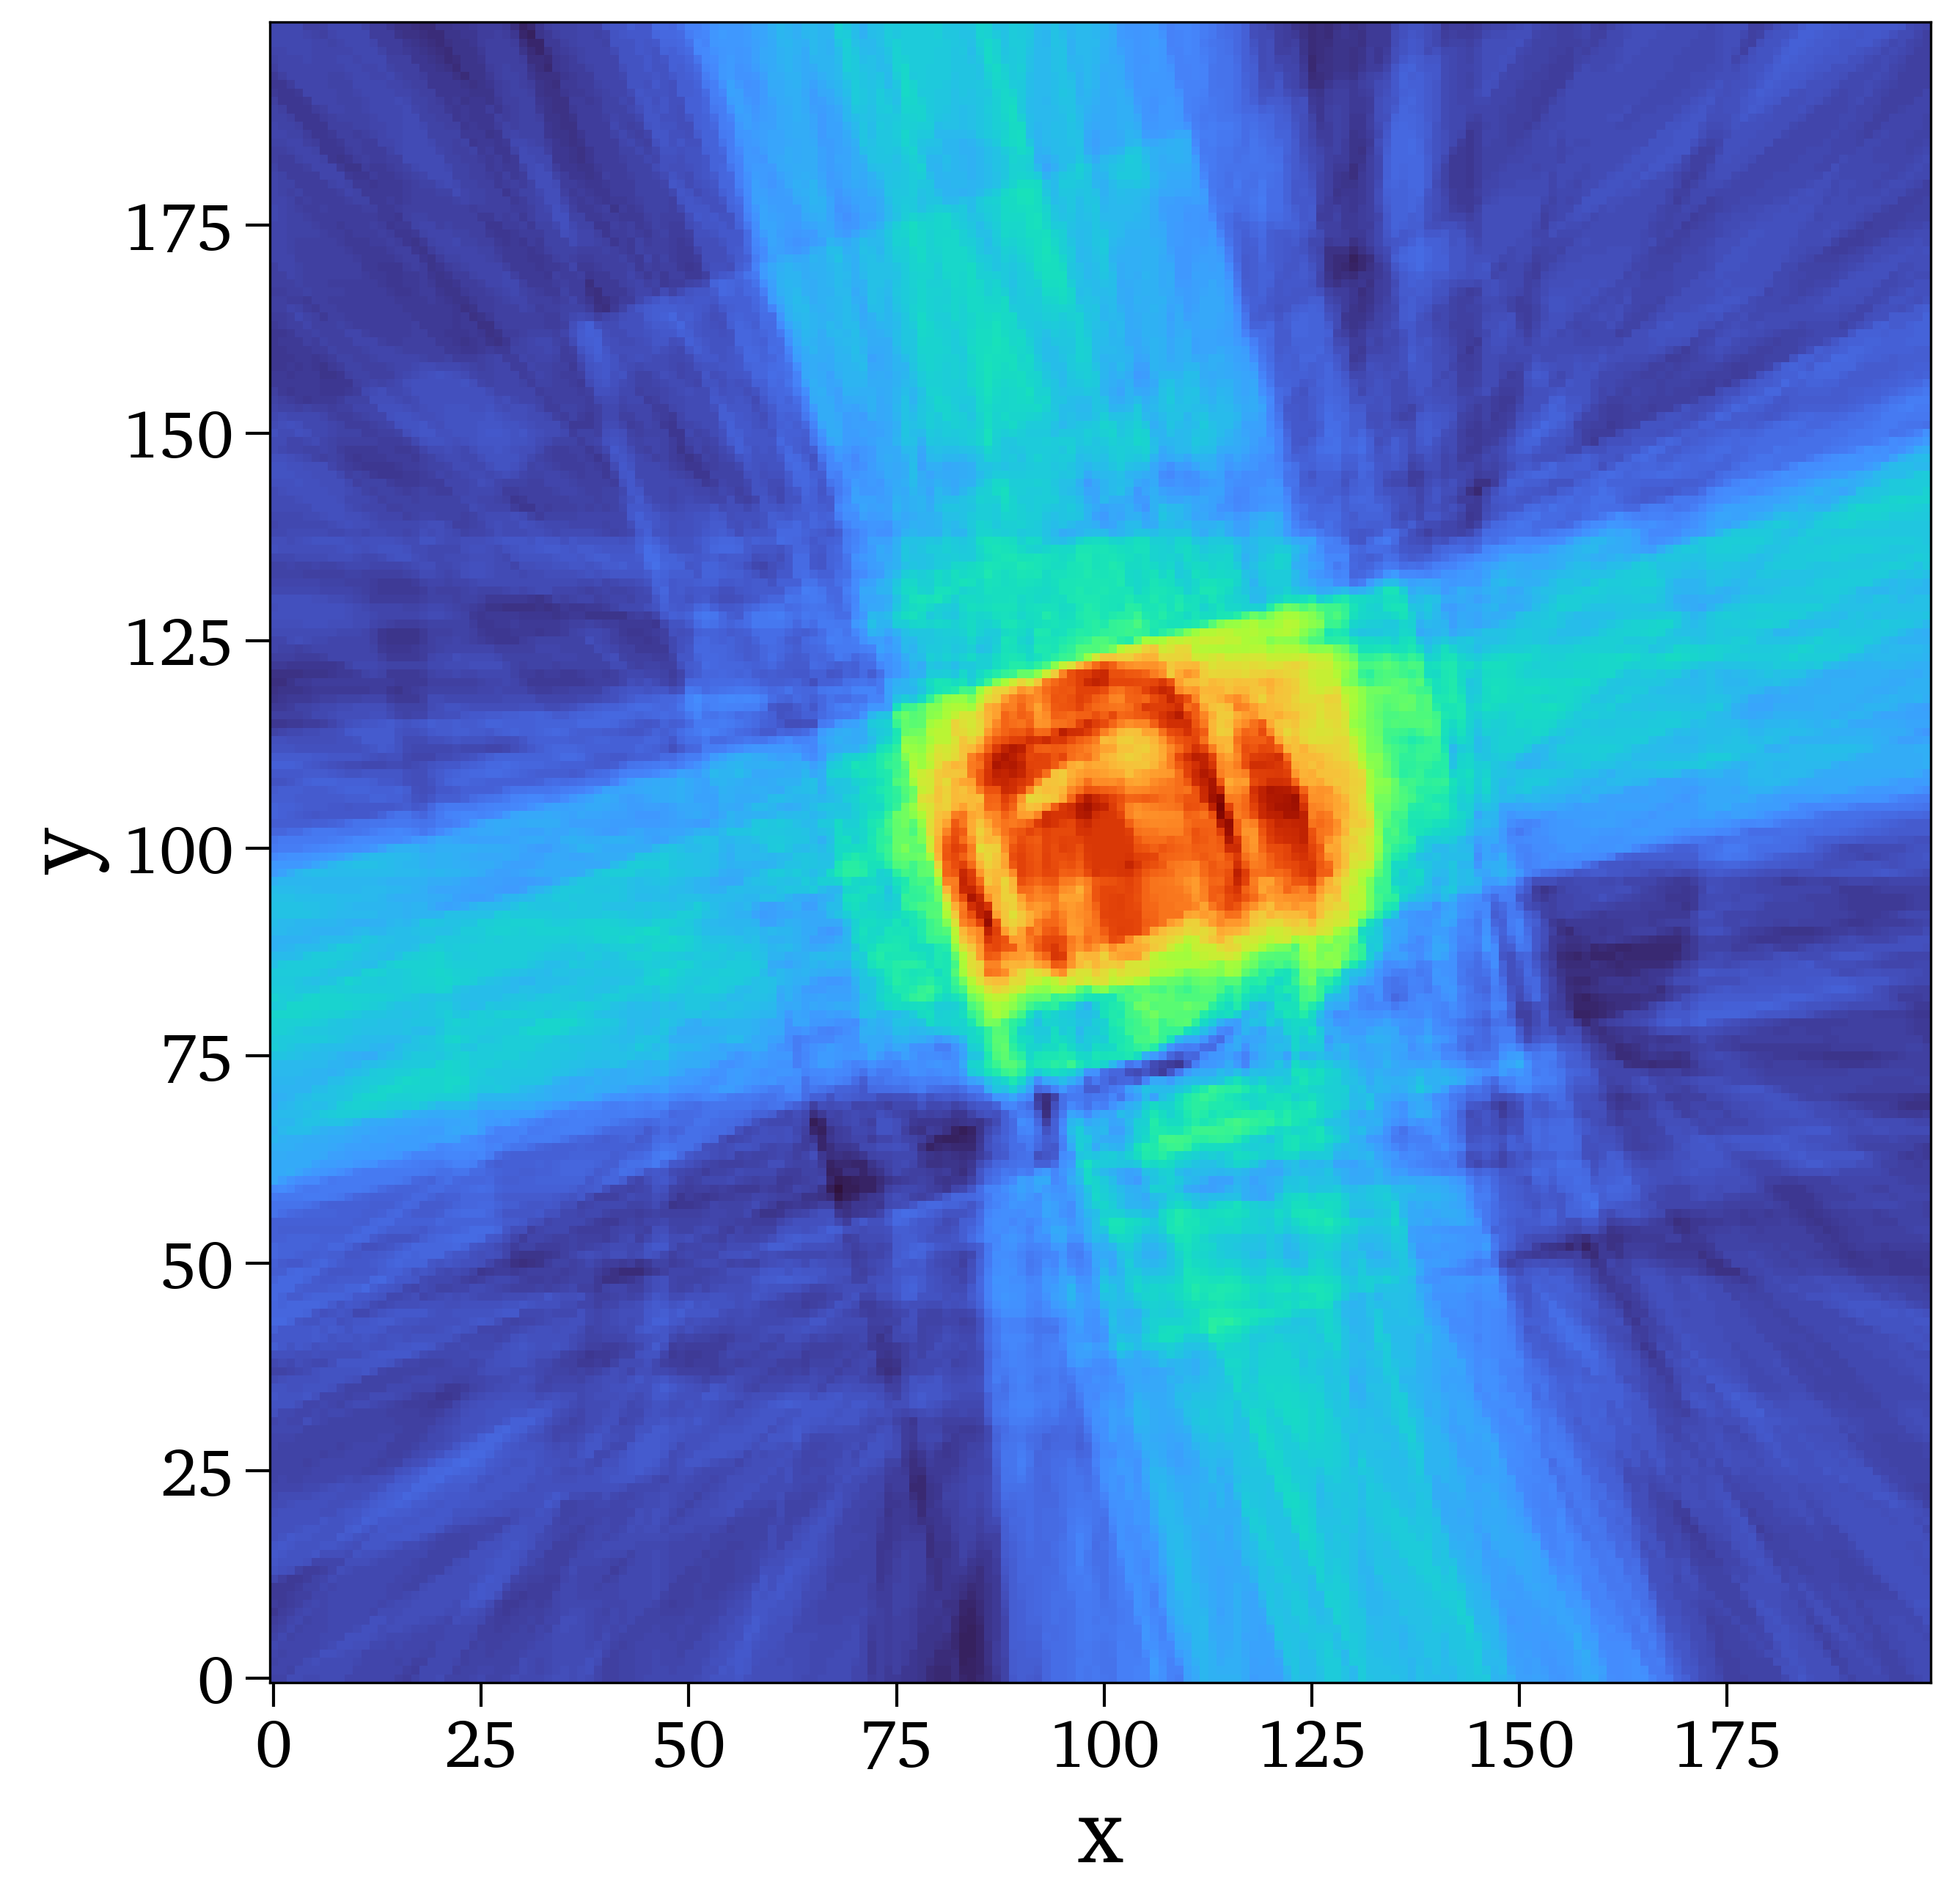

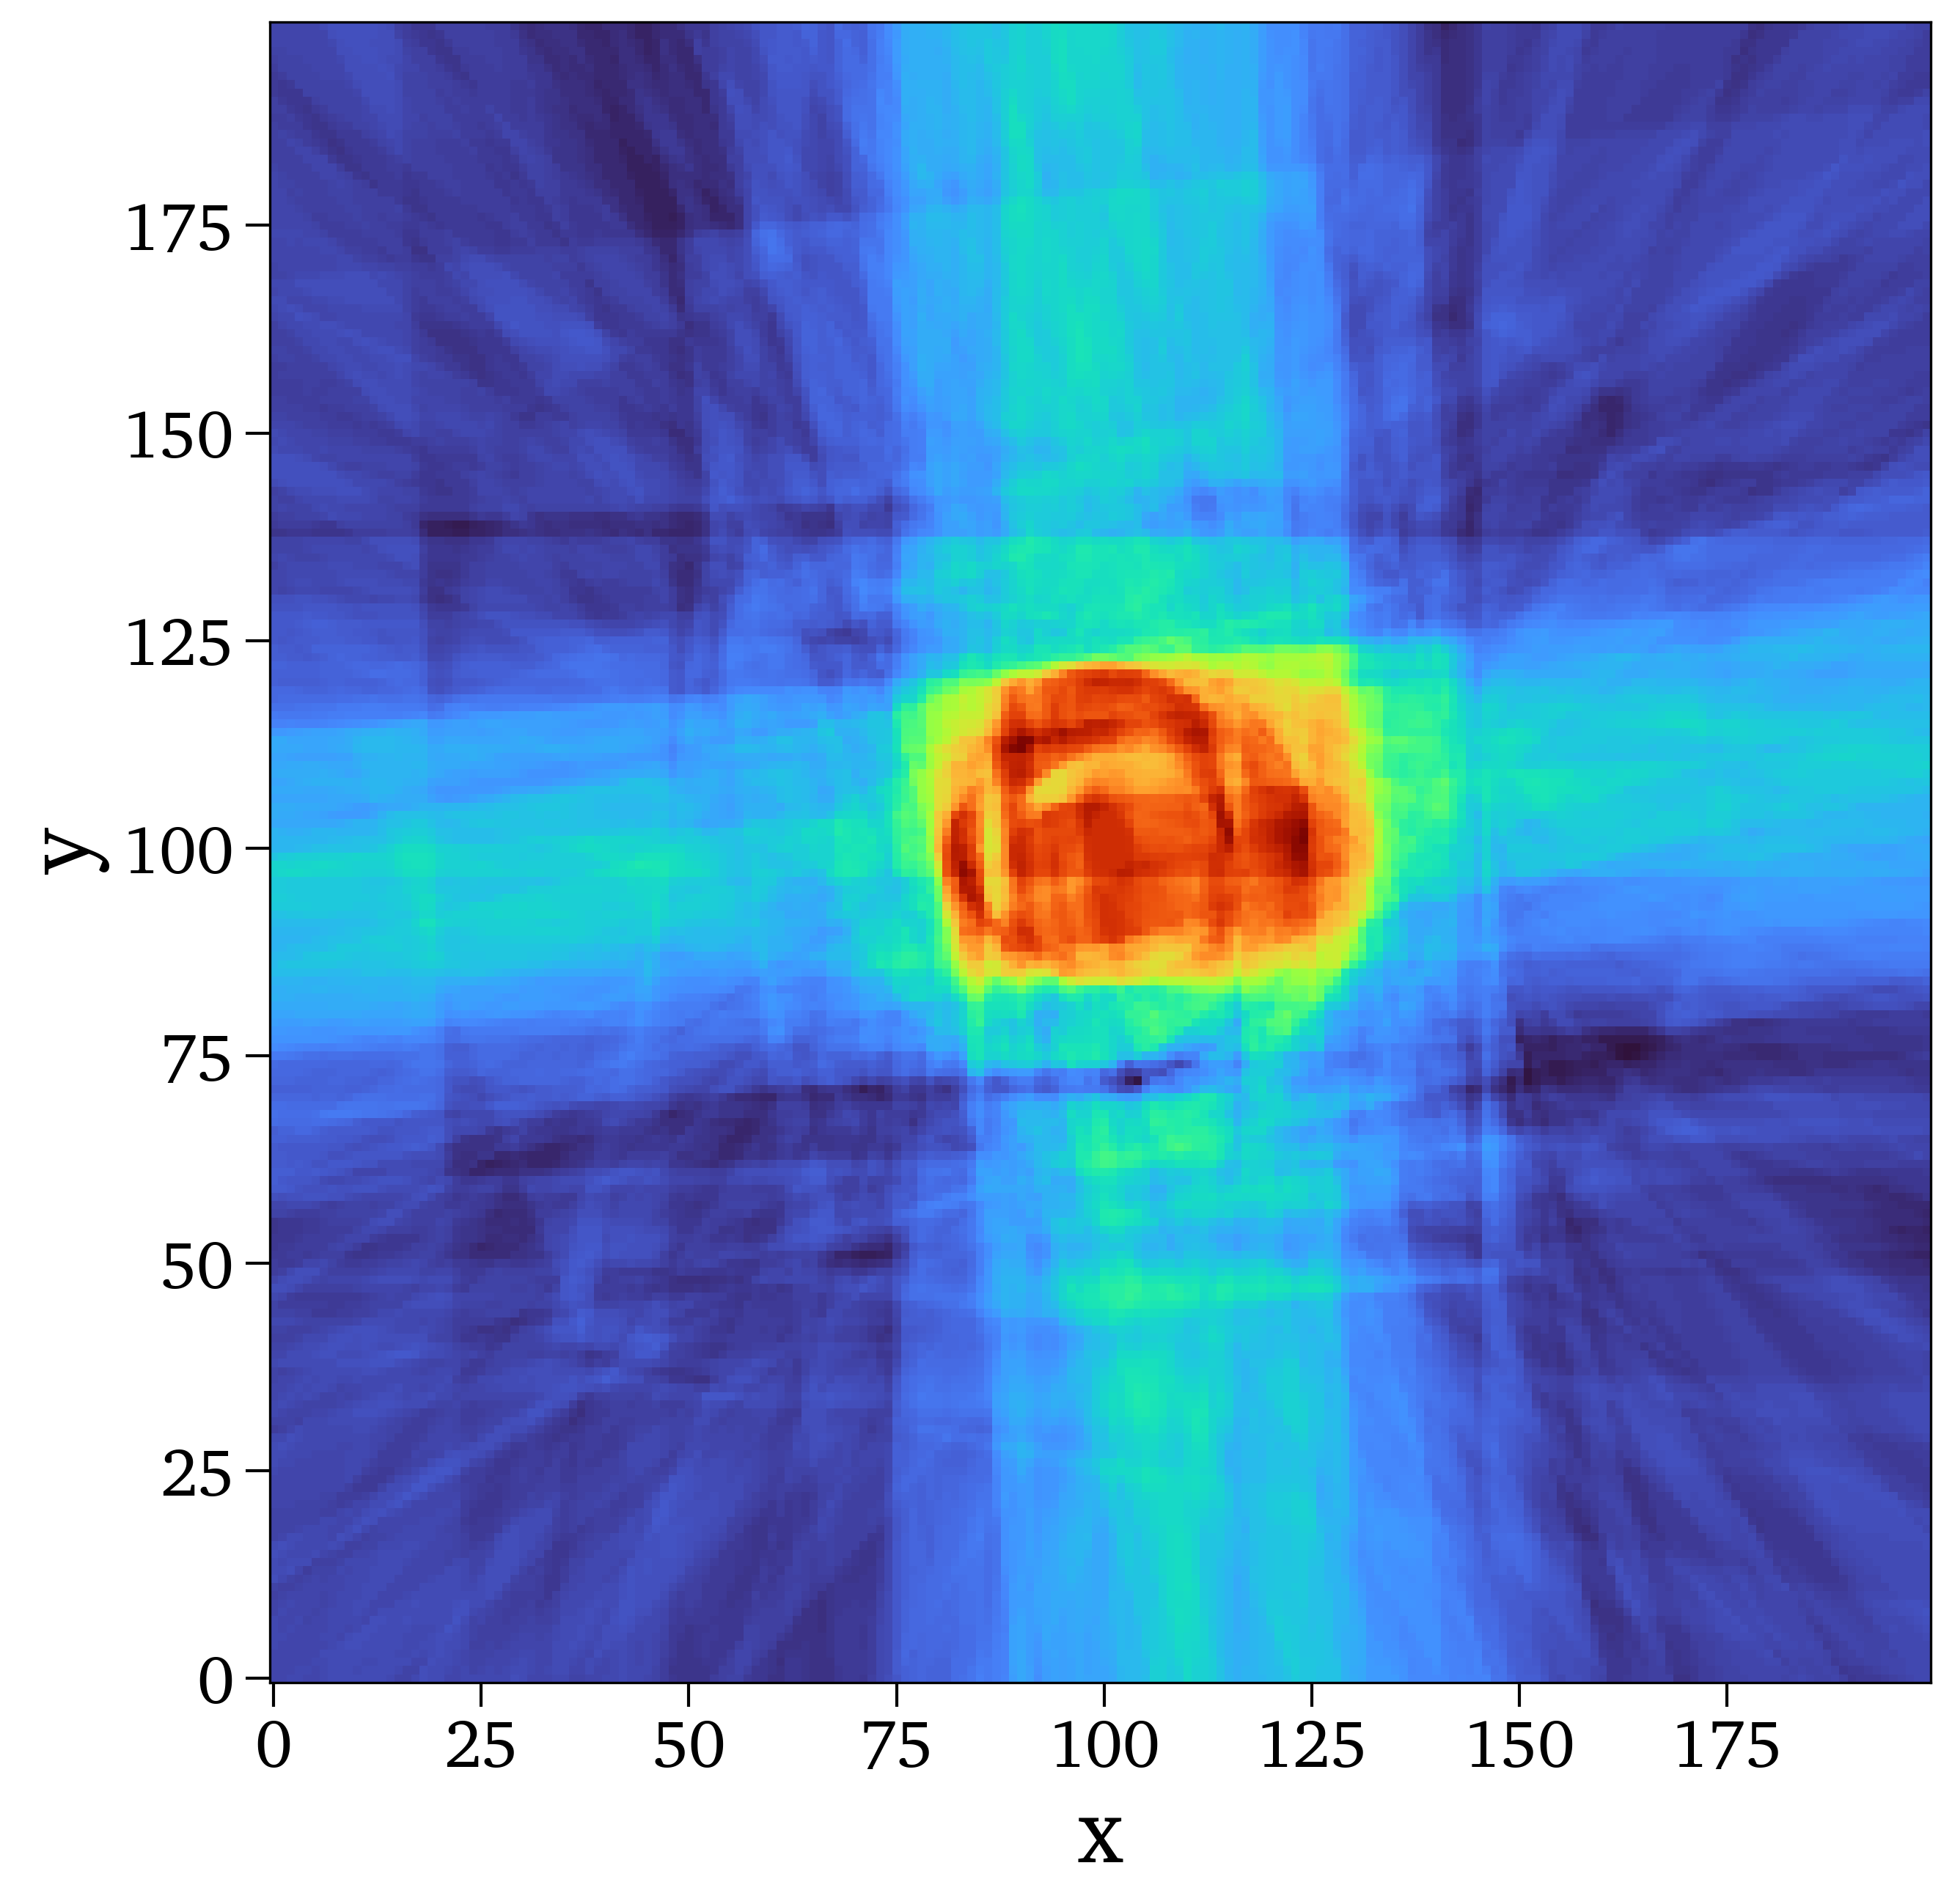

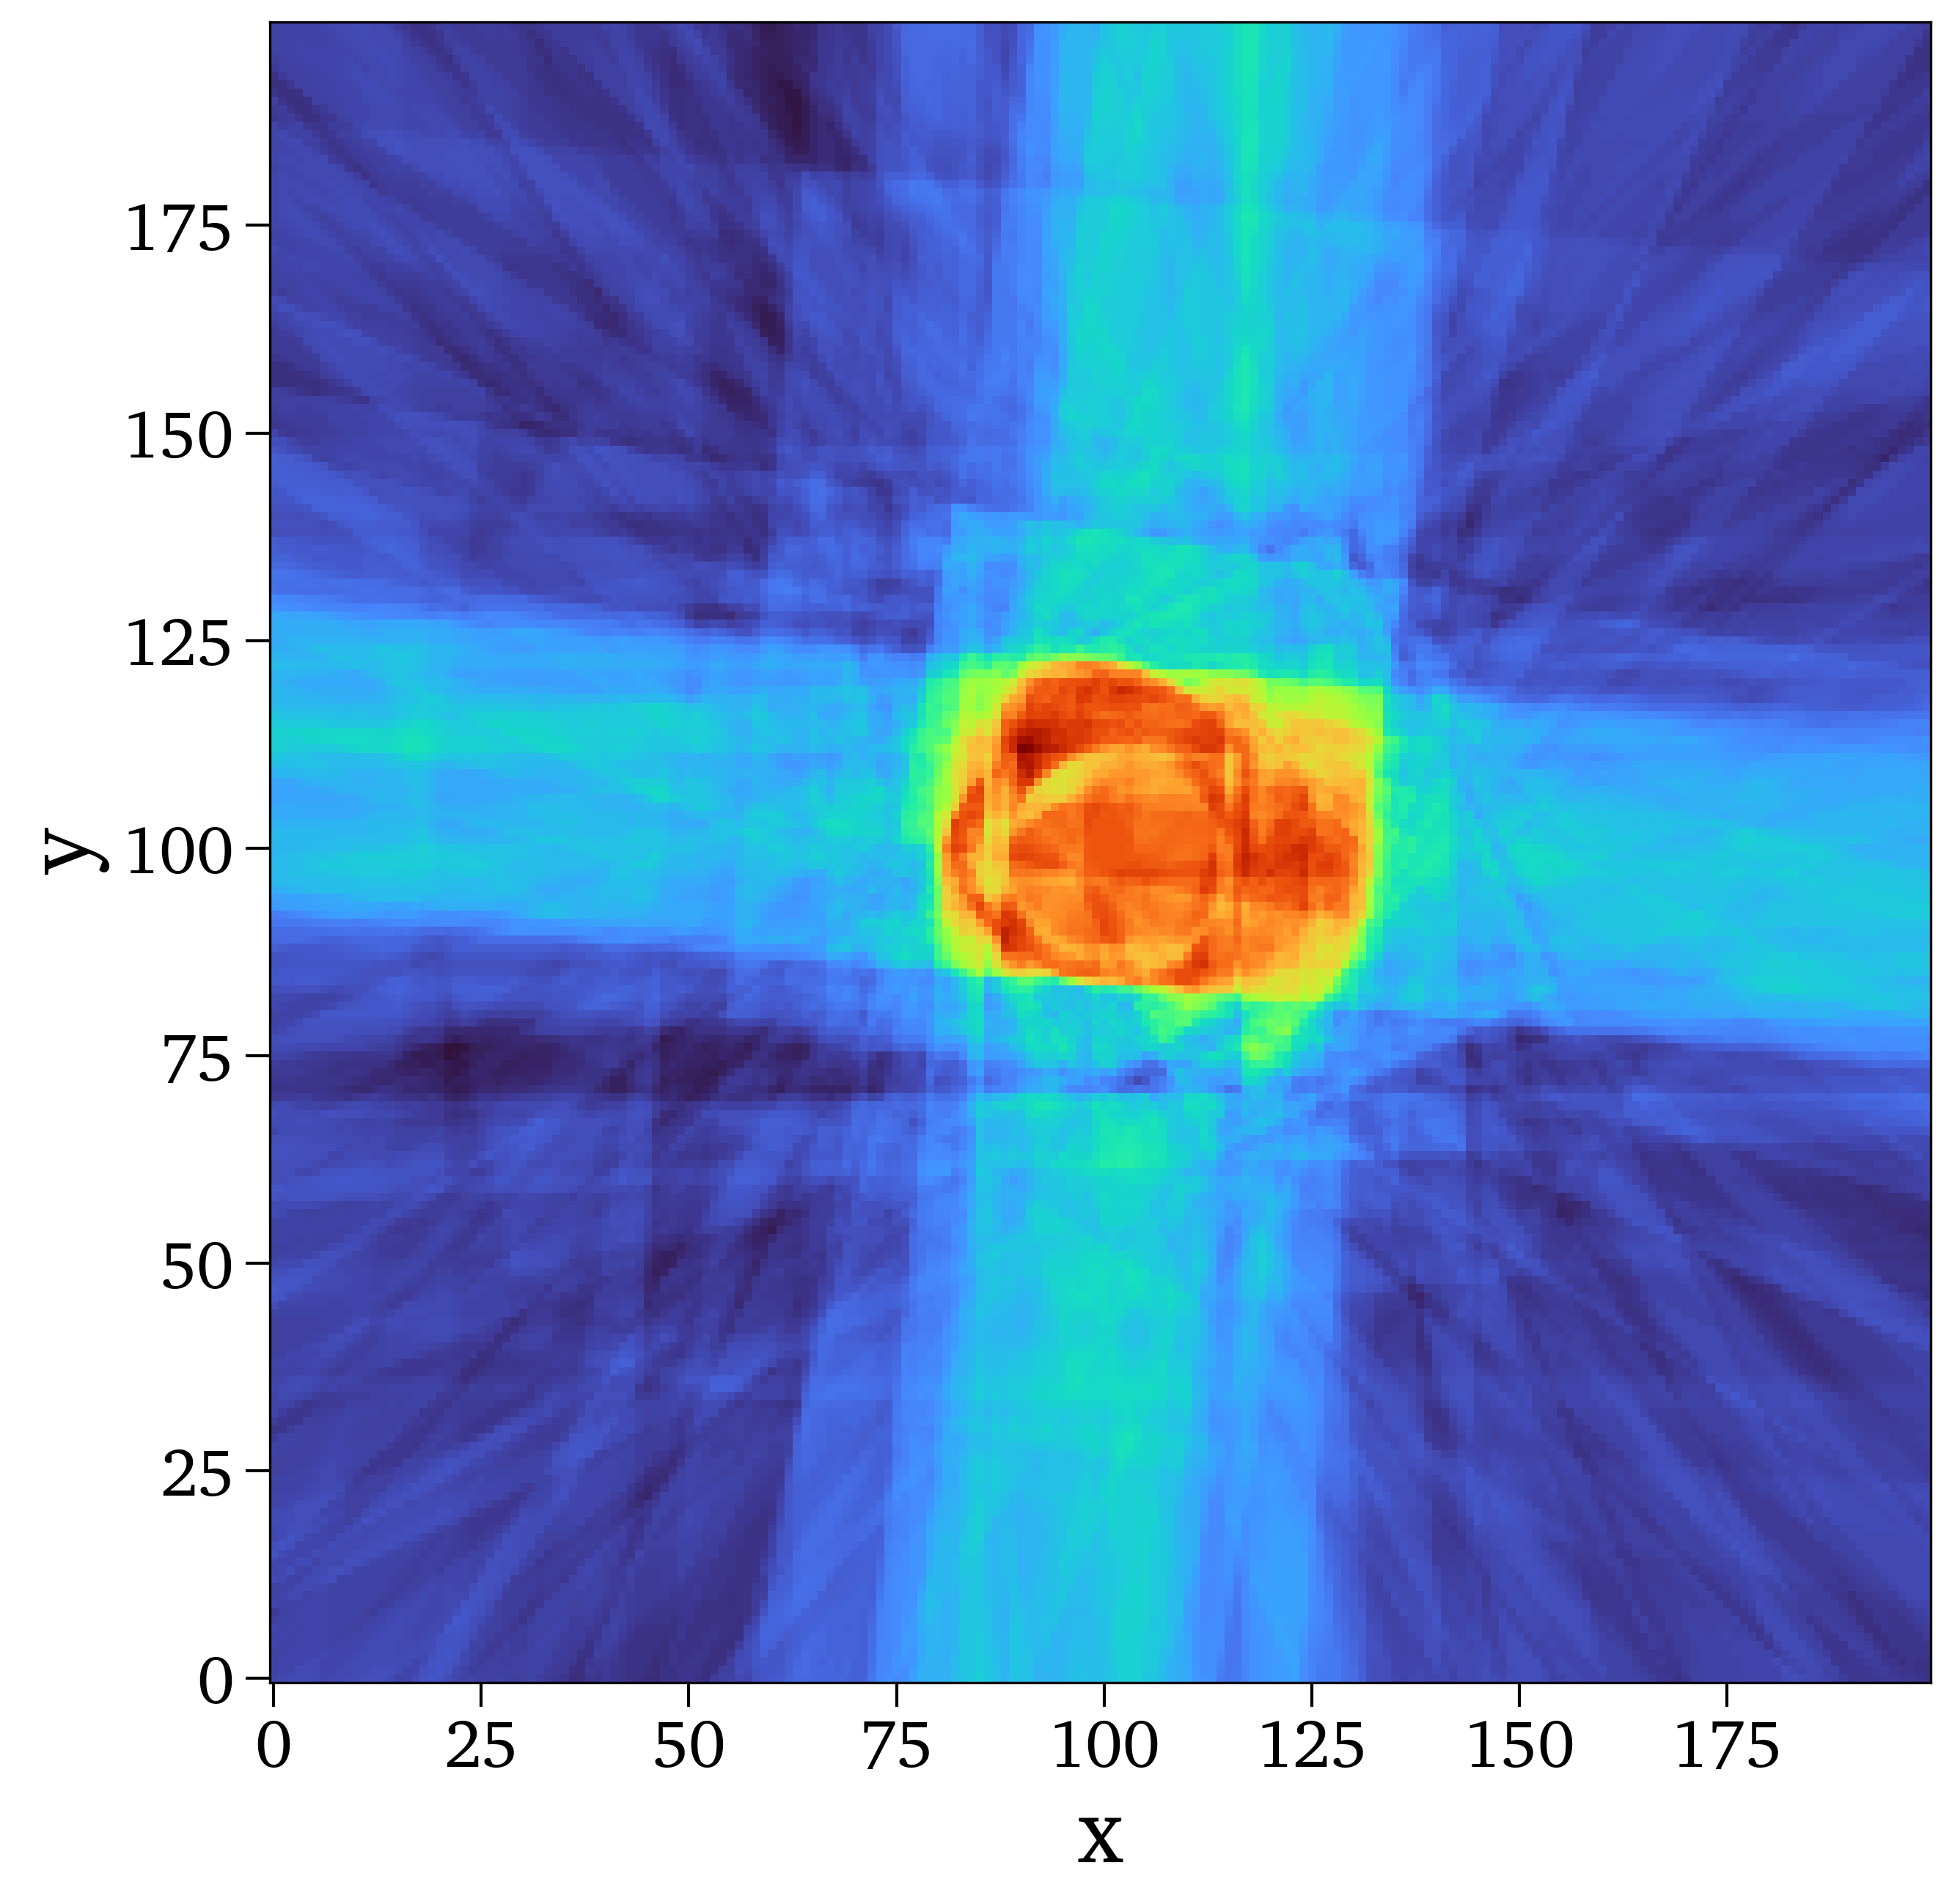

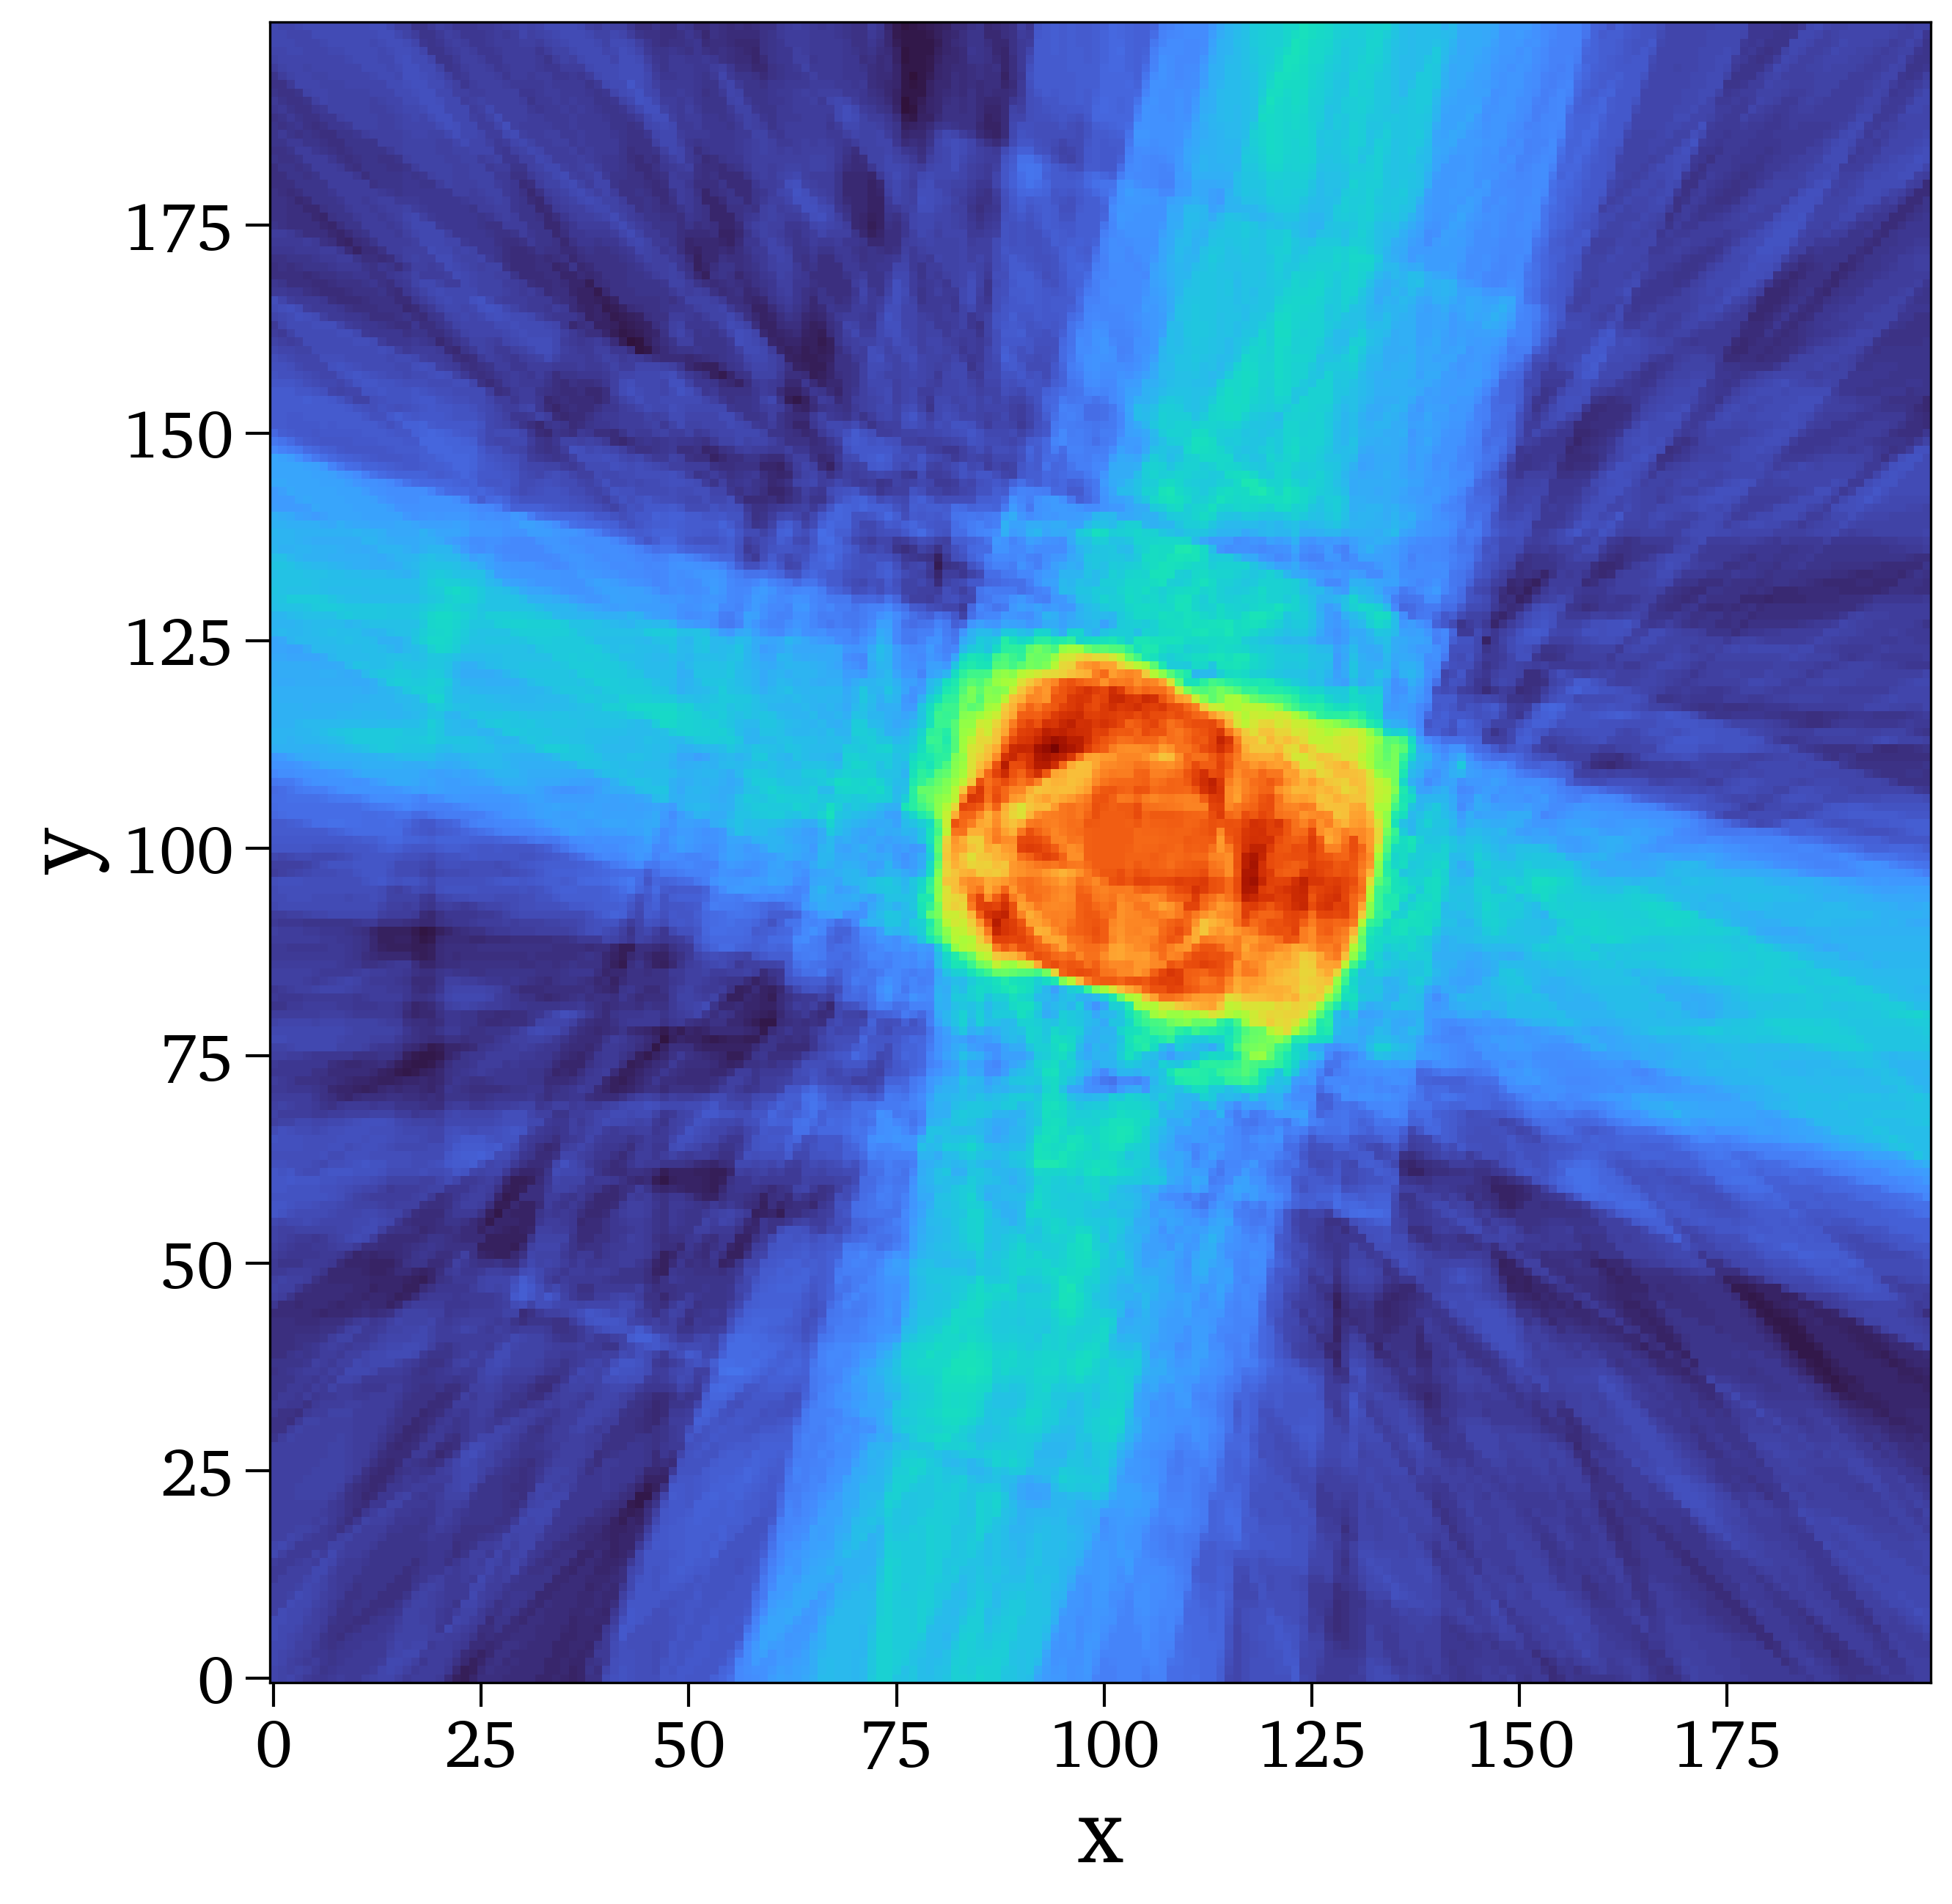

In [98]:
plt.style.use(os.path.join(WORKSPACE_PATH, 'ROMNet/romnet/extra/postprocessing/heavy.mplstyle'))
import matplotlib.pyplot                 as plt
import matplotlib.cm                     as cm
import matplotlib.animation              as animation

Nx      = 200
Ny      = 200

t0      = 4.5
tEnd    = 5.5
Nt      = 4
    
tVec    = np.linspace(t0,tEnd,Nt)
for it, t in enumerate(tVec):
    print('t=',t)
 
    
    fig = plt.figure()
    plt.imshow((zMat_[:,it]).reshape(Nx,Ny), origin='lower', cmap=cm.turbo)
    plt.xlabel('x')
    plt.ylabel('y')
    #plt.savefig(path_to_run_fld+'/Figures/XRec_t'+str(t)+'_Orig.pdf', format='pdf', bbox_inches='tight')
   